## Model for Cluster 0 bankruptcy prediction

### importing the libraries

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv('../artifacts/clustering/cluster_0_intermediate_train_data.csv')
dataset.shape

(1537, 70)

In [3]:
dataset.describe()

,Operating Gross Margin,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,...,Equity to Liability,PCA_ ROA(C) before interest and depreciation before interest_ ROA(A) before interest and % after tax,PCA_ Operating Profit Rate_ Pre-tax net Interest Rate,PCA_ Persistent EPS in the Last Four Seasons_ Operating Profit Per Share (Yuan ¥),PCA_ Cash flow rate_ Operating Funds to Liability,PCA_ Debt ratio %_ Current Liability to Assets,PCA_ Cash Reinvestment %_ CFO to Assets,PCA_ Contingent liabilities/Net worth_ Working Capital/Equity,PCA_ Net Income to Stockholder's Equity_PCA_ Borrowing dependency_ Current Liabilities/Equity,Bankrupt?
count,1537.000000,1537.000000,1.537000e+03,1.537000e+03,1.537000e+03,1537.000000,1537.000000,1537.000000,1.537000e+03,1537.000000,...,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000,1537.000000
mean,0.474484,0.565004,8.250106e-03,2.640836e-02,4.061094e-02,0.235831,0.717128,0.491583,1.952256e-03,0.687600,...,0.640472,0.472840,0.380158,0.467867,0.589422,0.195391,0.392651,0.434678,0.619305,0.026675
std,0.026110,0.020090,4.813391e-02,7.556416e-02,1.945088e-01,0.262741,0.044209,0.018568,4.415100e-02,0.016134,...,0.180903,0.072985,0.020196,0.058283,0.035099,0.092101,0.043728,0.004633,0.006637,0.161185
min,0.000000,0.000000,4.929390e-14,0.000000e+00,0.000000e+00,0.000000,0.000000,0.326836,0.000000e+00,0.321066,...,0.000000,0.140520,0.000000,0.077464,0.000000,0.000000,0.024894,0.370130,0.603607,0.000000
25%,0.464034,0.564833,7.827072e-14,3.769207e-14,0.000000e+00,0.000000,0.695400,0.484660,1.969746e-07,0.686098,...,0.485034,0.440794,0.380119,0.440174,0.578842,0.122227,0.373201,0.431887,0.616185,0.000000
50%,0.472071,0.564914,1.180722e-13,6.367129e-14,4.465212e-11,0.117798,0.714840,0.490653,3.270562e-07,0.686523,...,0.648533,0.468431,0.380388,0.465526,0.586996,0.189627,0.392147,0.434968,0.617710,0.000000
75%,0.481759,0.564986,1.836864e-13,1.493250e-13,8.075168e-11,0.472759,0.739131,0.497984,4.998446e-07,0.687185,...,0.798087,0.507932,0.380701,0.496333,0.600472,0.261942,0.414516,0.437912,0.620538,0.000000
max,1.000000,1.000000,4.767135e-01,5.103205e-01,1.000000e+00,0.997591,0.911488,0.707138,1.000000e+00,0.900673,...,1.000000,0.986791,1.000000,1.000000,1.000000,1.000000,0.704895,0.468682,0.787742,1.000000


In [4]:
dataset.head()

,Operating Gross Margin,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,...,Equity to Liability,PCA_ ROA(C) before interest and depreciation before interest_ ROA(A) before interest and % after tax,PCA_ Operating Profit Rate_ Pre-tax net Interest Rate,PCA_ Persistent EPS in the Last Four Seasons_ Operating Profit Per Share (Yuan ¥),PCA_ Cash flow rate_ Operating Funds to Liability,PCA_ Debt ratio %_ Current Liability to Assets,PCA_ Cash Reinvestment %_ CFO to Assets,PCA_ Contingent liabilities/Net worth_ Working Capital/Equity,PCA_ Net Income to Stockholder's Equity_PCA_ Borrowing dependency_ Current Liabilities/Equity,Bankrupt?
0,0.463953,0.564947,5.007106e-14,9.742166e-02,2.216623e-11,0.603355,0.743005,0.493137,6.793877e-07,0.687029,...,0.553275,0.490190,0.380453,0.493125,0.585293,0.238698,0.392352,0.430648,0.617819,0
1,0.478268,0.564931,1.483813e-13,1.242340e-13,0.000000e+00,0.000000,0.772958,0.510855,4.967942e-07,0.686373,...,0.827906,0.489587,0.380496,0.490360,0.618617,0.113340,0.434539,0.439661,0.616066,0
2,0.511307,0.564797,3.734790e-13,2.037814e-13,6.365387e-11,0.000000,0.712560,0.481339,7.604443e-08,0.686835,...,0.766179,0.462602,0.380400,0.448663,0.572961,0.145385,0.366565,0.439021,0.617216,0
3,0.477293,0.564994,1.877942e-13,1.464939e-13,0.000000e+00,0.260094,0.689076,0.488087,1.041524e-07,0.686369,...,0.844930,0.449891,0.380231,0.445884,0.593096,0.096297,0.392363,0.433112,0.616399,0
4,0.462957,0.564875,1.428451e-01,1.949397e-02,4.940459e-11,0.000000,0.853197,0.455961,2.312051e-06,0.690569,...,0.376343,0.504565,0.380585,0.618075,0.575142,0.259801,0.364976,0.435650,0.622951,0


In [5]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
bankrupt_=dataset['Bankrupt?']
dataset=pd.DataFrame(sc.fit_transform(dataset.iloc[:,:-2]),columns=dataset.columns[:-2])
dataset['Bankrupt?']=bankrupt_

In [6]:
bankrupt_=dataset['Bankrupt?']
dataset=dataset.drop(columns=['Bankrupt?'])

In [7]:
dataset.describe()

,Operating Gross Margin,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,...,Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,PCA_ ROA(C) before interest and depreciation before interest_ ROA(A) before interest and % after tax,PCA_ Operating Profit Rate_ Pre-tax net Interest Rate,PCA_ Persistent EPS in the Last Four Seasons_ Operating Profit Per Share (Yuan ¥),PCA_ Cash flow rate_ Operating Funds to Liability,PCA_ Debt ratio %_ Current Liability to Assets,PCA_ Cash Reinvestment %_ CFO to Assets,PCA_ Contingent liabilities/Net worth_ Working Capital/Equity
count,1.537000e+03,1.537000e+03,1.537000e+03,1.537000e+03,1.537000e+03,1.537000e+03,1.537000e+03,1.537000e+03,1.537000e+03,1.537000e+03,...,1.537000e+03,1537.0,1.537000e+03,1.537000e+03,1.537000e+03,1.537000e+03,1.537000e+03,1.537000e+03,1.537000e+03,1.537000e+03
mean,-5.767092e-16,2.623507e-15,1.155730e-18,-5.778649e-18,-2.773752e-17,-1.618022e-17,1.137238e-15,4.529305e-15,-3.467190e-18,-4.310872e-15,...,-3.622057e-15,0.0,-1.941626e-16,-1.918512e-16,2.365201e-15,-2.427033e-16,-1.530186e-15,-2.149658e-16,1.130304e-15,8.399845e-15
std,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00,...,1.000325e+00,0.0,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00,1.000325e+00
min,-1.817835e+01,-2.813248e+01,-1.714548e-01,-3.495963e-01,-2.088551e-01,-8.978724e-01,-1.622669e+01,-8.875519e+00,-4.423209e-02,-2.272516e+01,...,-8.863550e+00,0.0,-3.541573e+00,-4.554770e+00,-1.882930e+01,-6.700595e+00,-1.679858e+01,-2.122172e+00,-8.412743e+00,-1.393582e+01
25%,-4.003348e-01,-8.488469e-03,-1.714548e-01,-3.495963e-01,-2.088551e-01,-8.978724e-01,-4.916297e-01,-3.729903e-01,-4.422763e-02,-9.313690e-02,...,-7.442970e-02,0.0,-8.595177e-01,-4.392256e-01,-1.940159e-03,-4.752914e-01,-3.015332e-01,-7.946492e-01,-4.449301e-01,-6.023808e-01
50%,-9.242317e-02,-4.489833e-03,-1.714548e-01,-3.495963e-01,-2.088551e-01,-4.493827e-01,-5.175947e-02,-5.009609e-02,-4.422468e-02,-6.676769e-02,...,-7.216710e-02,0.0,4.457444e-02,-6.043135e-02,1.138366e-02,-4.017034e-02,-6.915147e-02,-6.260228e-02,-1.154105e-02,6.262522e-02
75%,2.787382e-01,-8.963754e-04,-1.714548e-01,-3.495963e-01,-2.088551e-01,9.020483e-01,4.978667e-01,3.448223e-01,-4.422077e-02,-2.576303e-02,...,-1.576192e-02,0.0,8.715477e-01,4.809706e-01,2.689483e-02,4.885728e-01,3.149144e-01,7.228122e-01,5.001770e-01,6.982711e-01
max,2.013351e+01,2.165918e+01,9.735671e+00,6.406074e+00,4.933973e+00,2.900228e+00,4.397847e+00,1.161268e+01,2.261268e+01,1.321053e+01,...,1.976040e+01,0.0,1.988053e+00,7.044201e+00,3.070090e+01,9.133154e+00,1.170151e+01,8.738968e+00,7.142828e+00,7.341485e+00


In [8]:
dataset.head()

,Operating Gross Margin,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,...,Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,PCA_ ROA(C) before interest and depreciation before interest_ ROA(A) before interest and % after tax,PCA_ Operating Profit Rate_ Pre-tax net Interest Rate,PCA_ Persistent EPS in the Last Four Seasons_ Operating Profit Per Share (Yuan ¥),PCA_ Cash flow rate_ Operating Funds to Liability,PCA_ Debt ratio %_ Current Liability to Assets,PCA_ Cash Reinvestment %_ CFO to Assets,PCA_ Contingent liabilities/Net worth_ Working Capital/Equity
0,-0.403452,-0.002845,-0.171455,0.940081,-0.208855,1.399265,0.585535,0.083711,-0.044217,-0.035443,...,-0.065466,0.0,-0.482171,0.237800,0.014628,0.433509,-0.117688,0.470362,-0.006840,-0.869898
1,0.144975,-0.003619,-0.171455,-0.349596,-0.208855,-0.897872,1.263297,1.038241,-0.044221,-0.076101,...,-0.074430,0.0,1.036438,0.229536,0.016759,0.386061,0.832046,-0.891174,0.958217,1.075837
2,1.410762,-0.010275,-0.171455,-0.349596,-0.208855,-0.897872,-0.103347,-0.551910,-0.044230,-0.047438,...,0.169195,0.0,0.695110,-0.140322,0.012012,-0.329600,-0.469153,-0.543127,-0.596754,0.937745
3,0.107623,-0.000510,-0.171455,-0.349596,-0.208855,0.092376,-0.634741,-0.188341,-0.044230,-0.076351,...,-0.074430,0.0,1.130574,-0.314536,0.003602,-0.377297,0.104705,-1.076276,-0.006596,-0.337992
4,-0.441599,-0.006412,2.797172,-0.091533,-0.208855,-0.897872,3.078884,-1.919094,-0.044180,0.184059,...,0.039623,0.0,-1.460539,0.434818,0.021178,2.578066,-0.406979,0.699558,-0.633090,0.209967


C:\Windows\Temp\ipykernel_19732\609977884.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


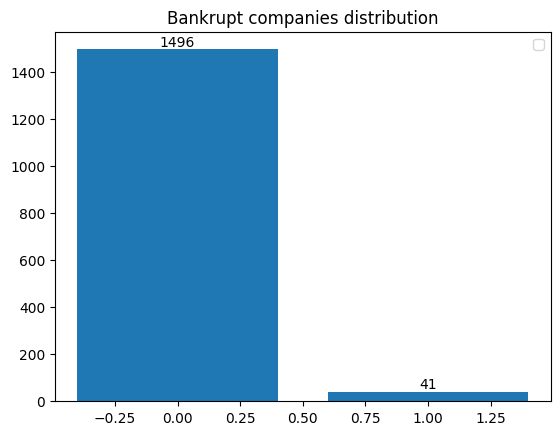

In [9]:
import matplotlib.pyplot as plt

categories=[0,1]
values=[len(dataset[bankrupt_==0]),len(dataset[bankrupt_==1])]
bars = plt.bar(x=categories, height=values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title("Bankrupt companies distribution")
plt.legend()
plt.show()

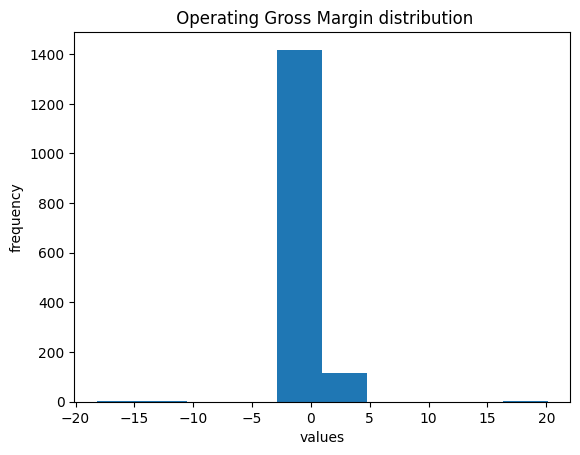

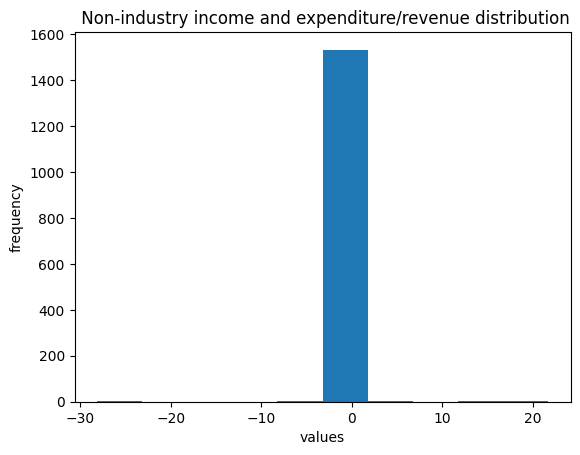

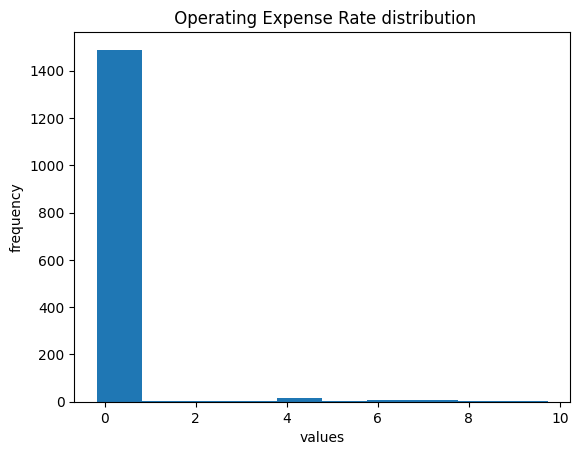

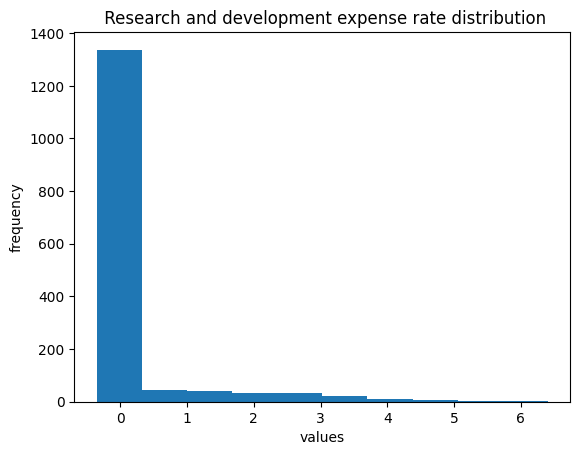

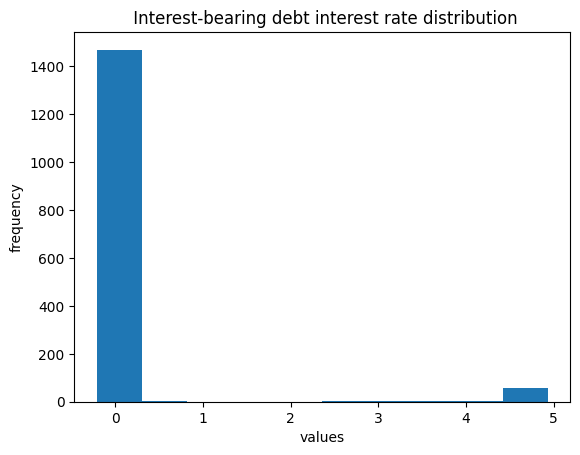

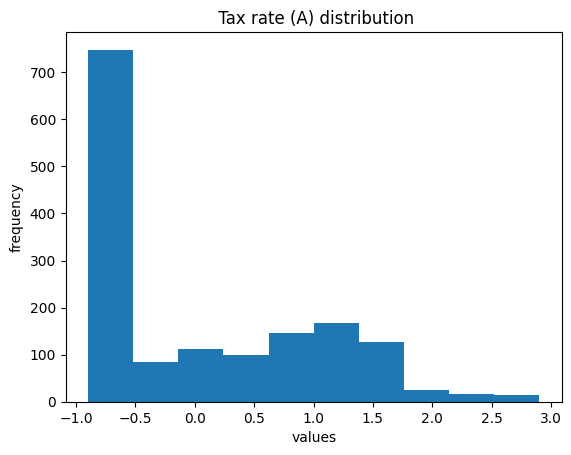

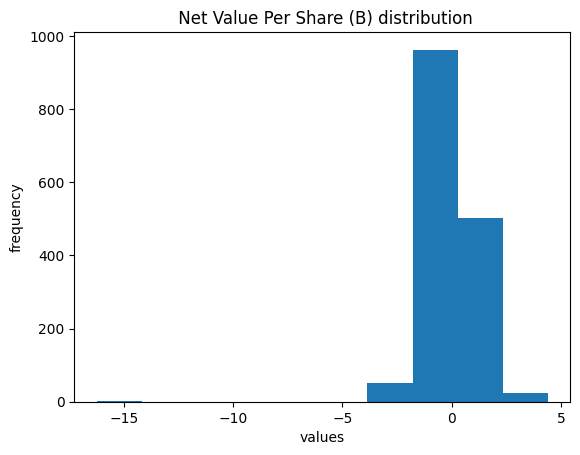

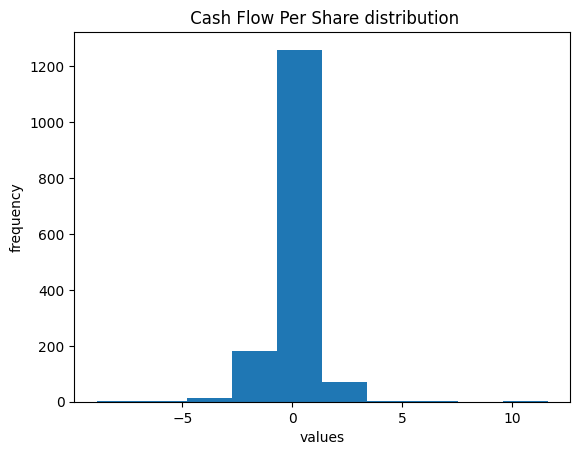

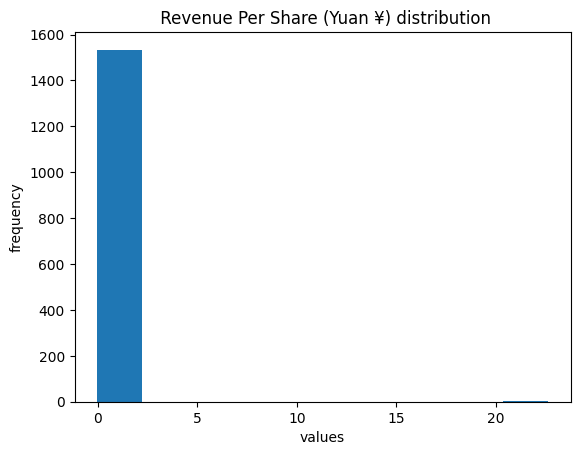

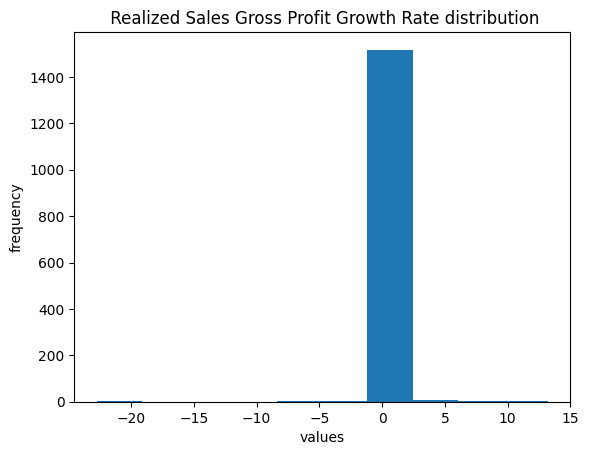

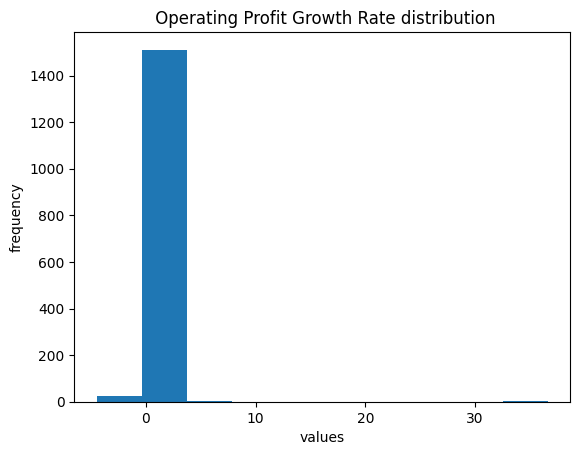

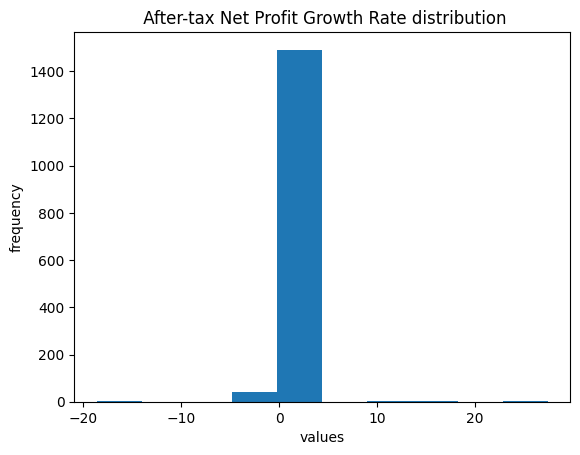

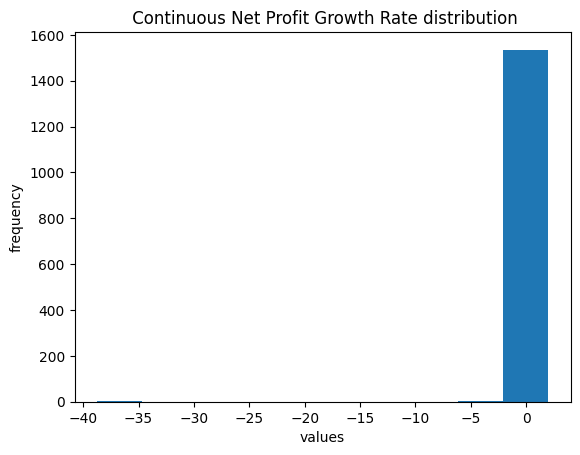

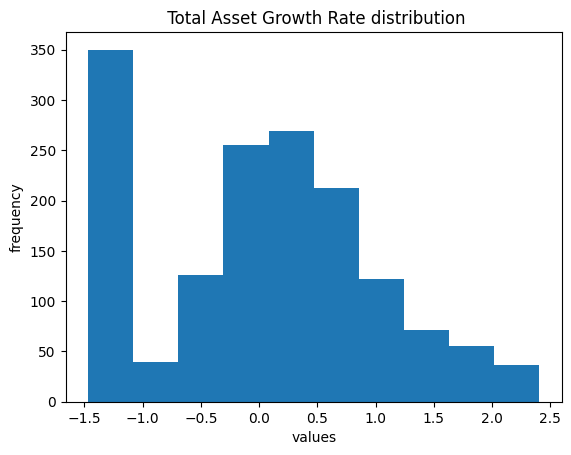

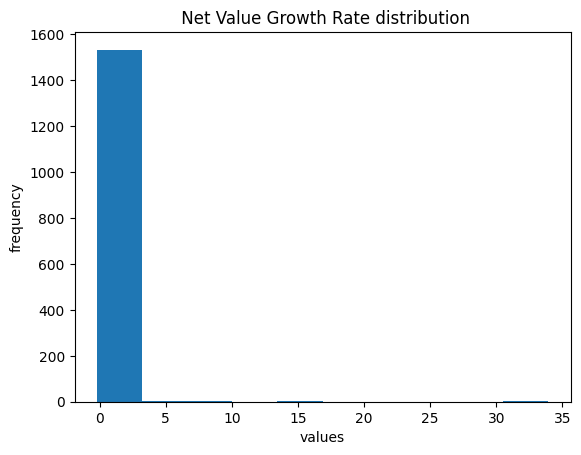

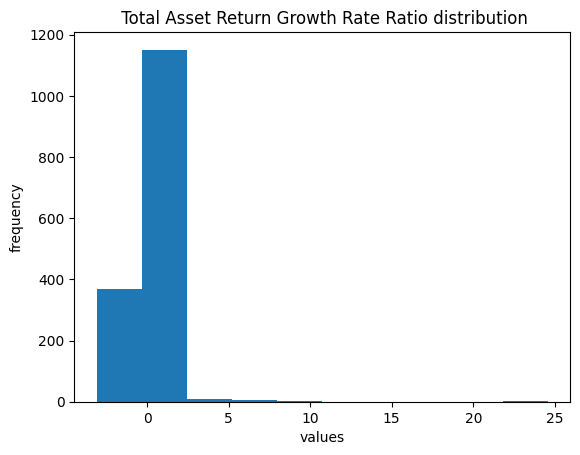

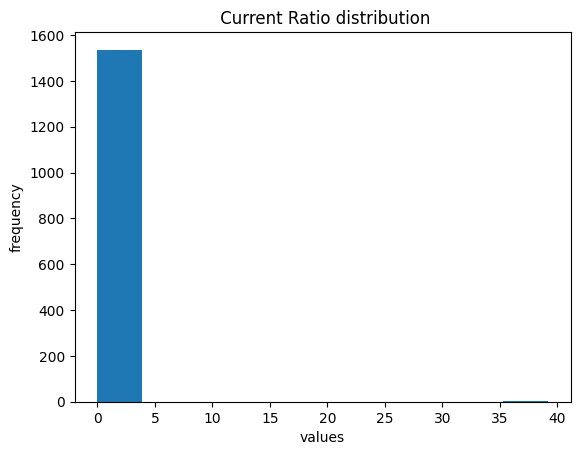

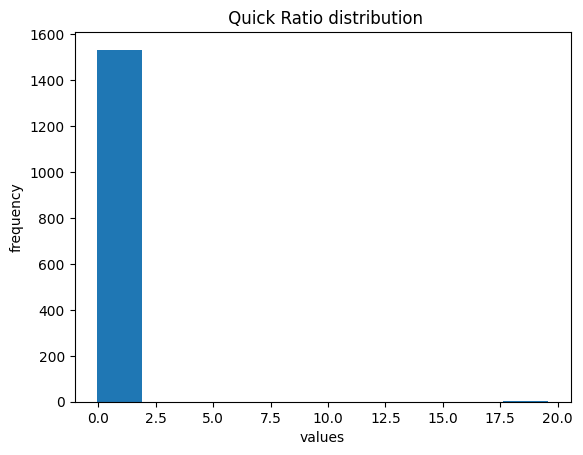

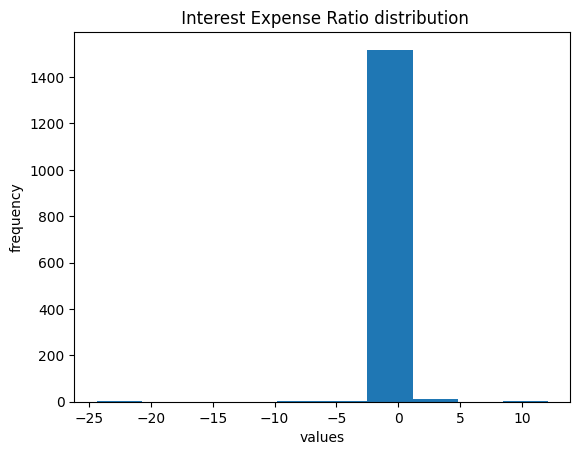

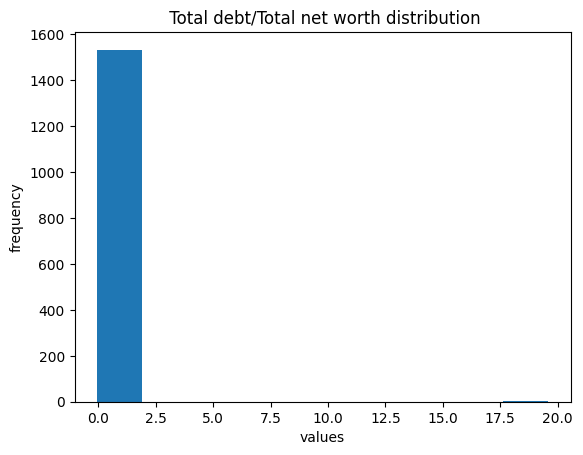

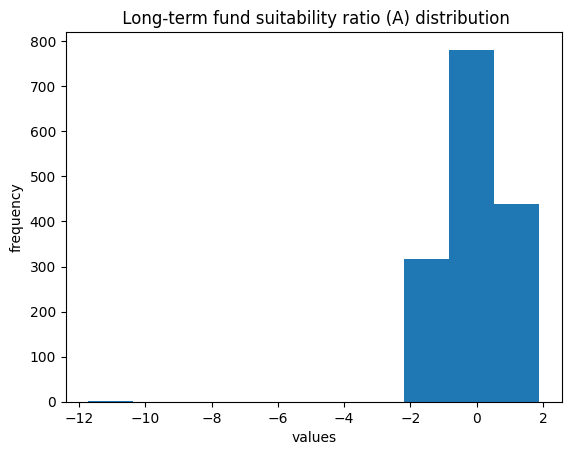

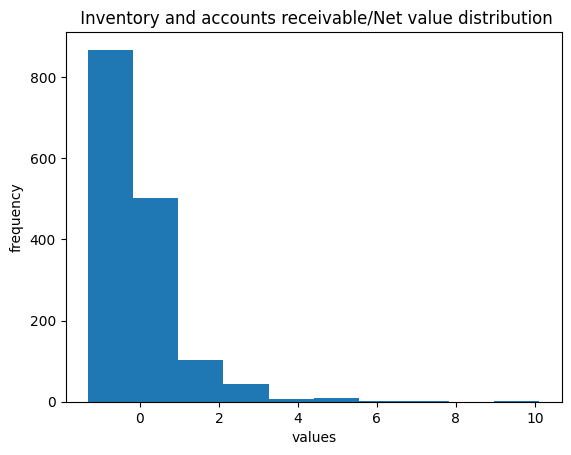

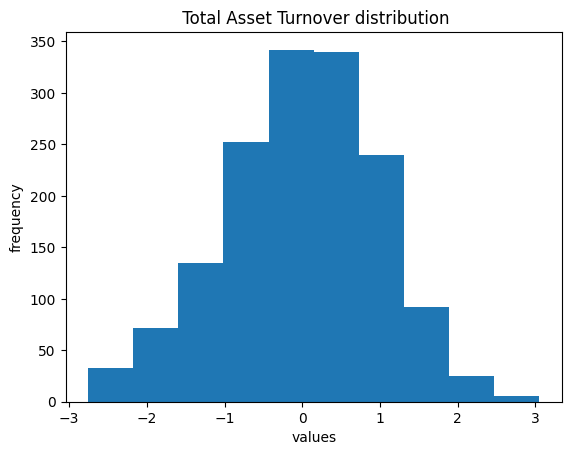

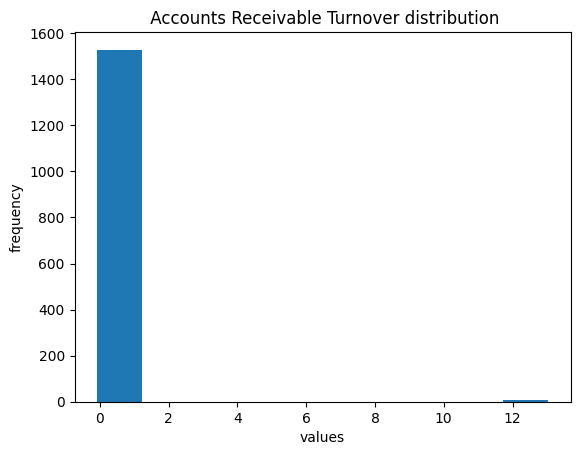

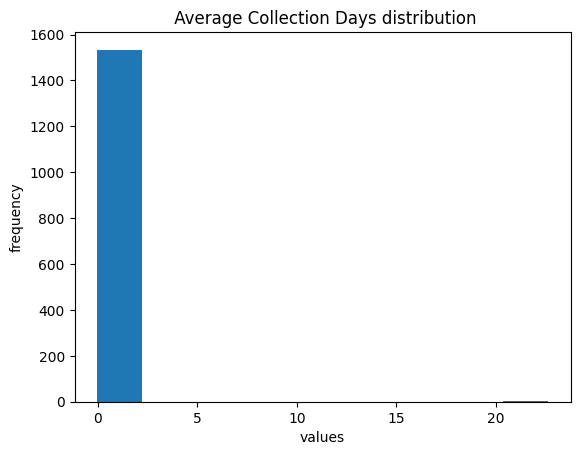

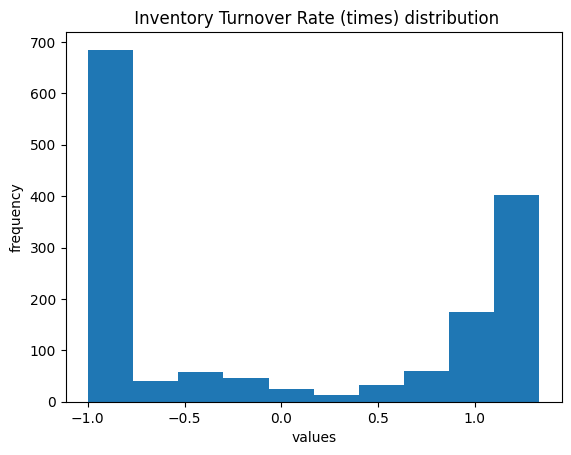

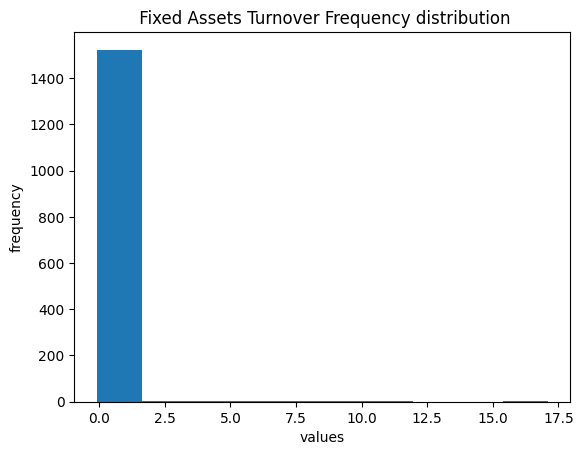

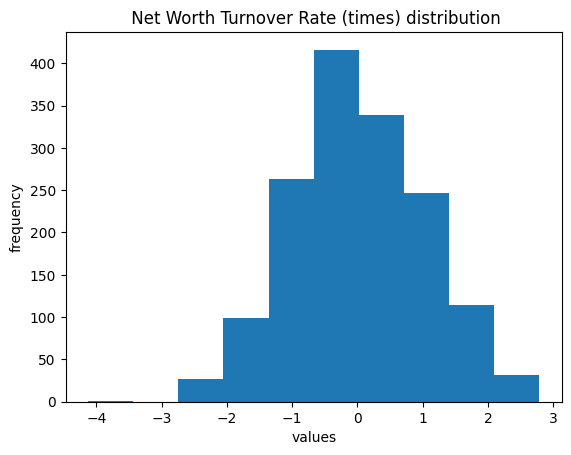

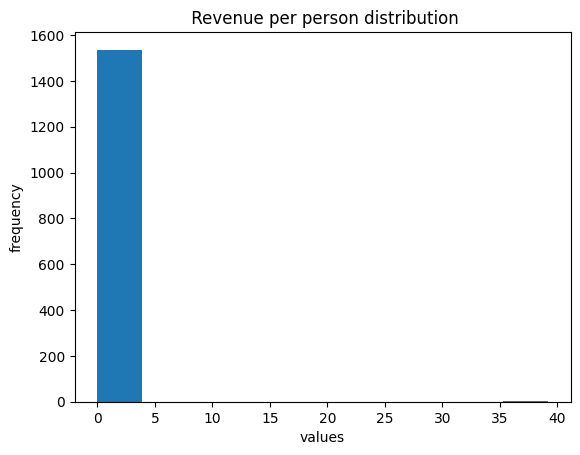

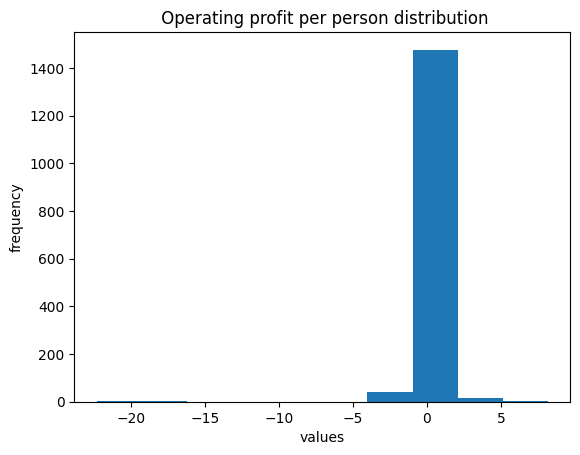

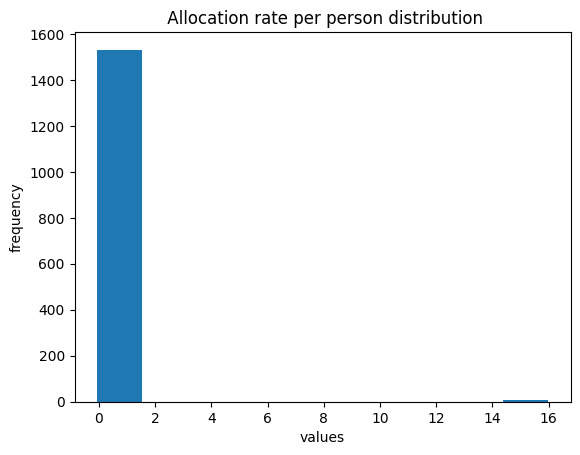

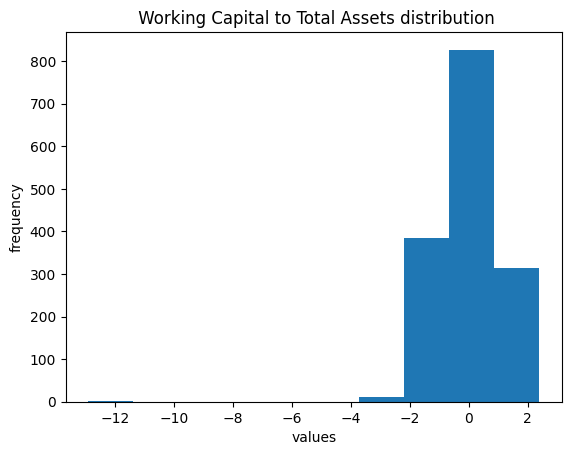

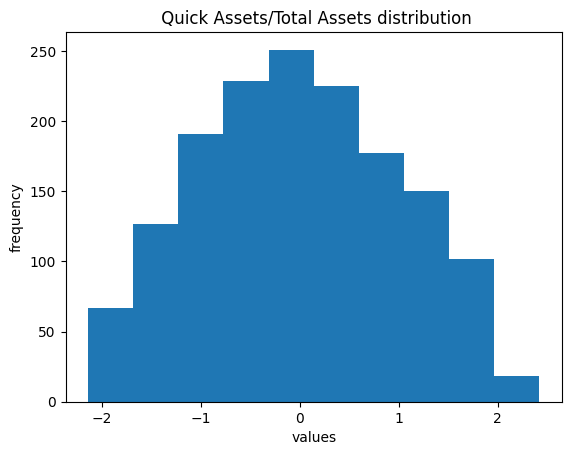

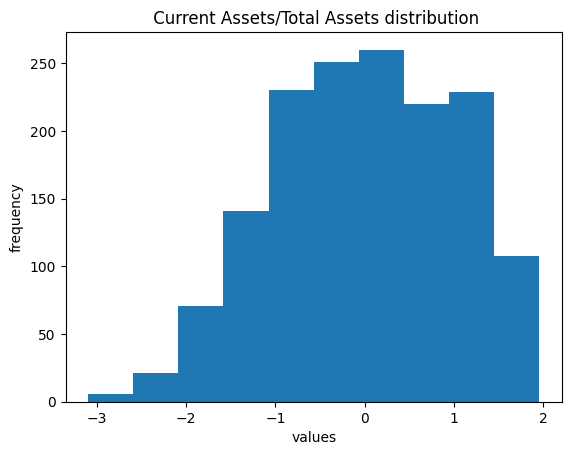

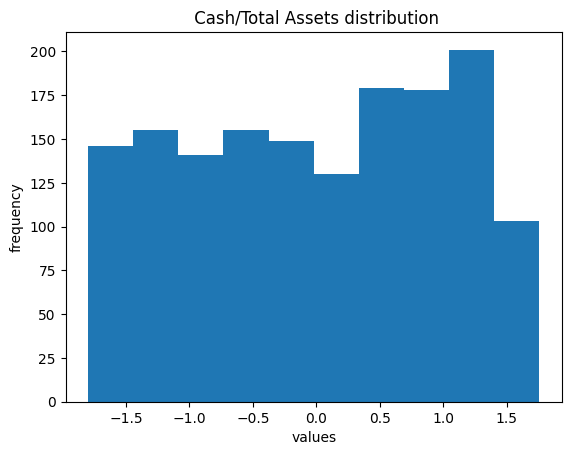

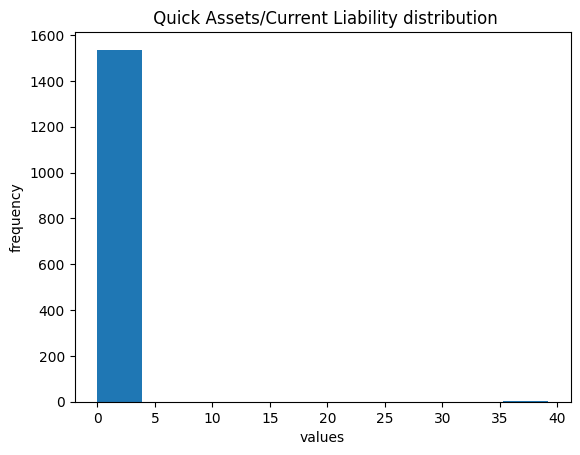

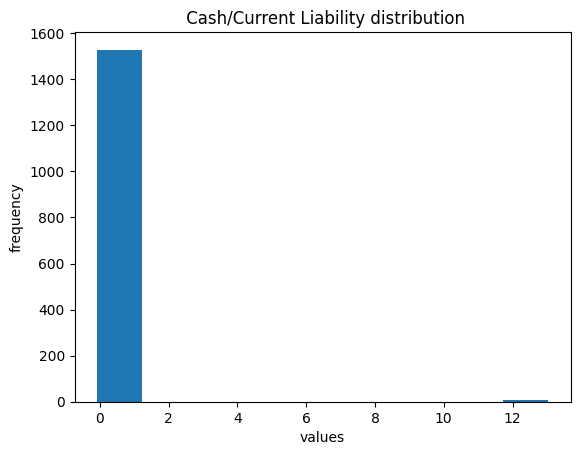

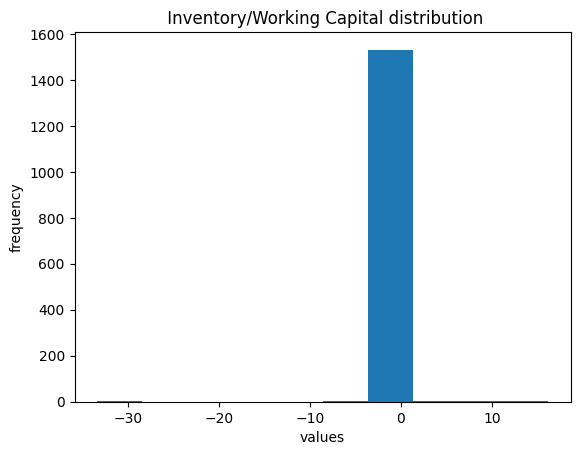

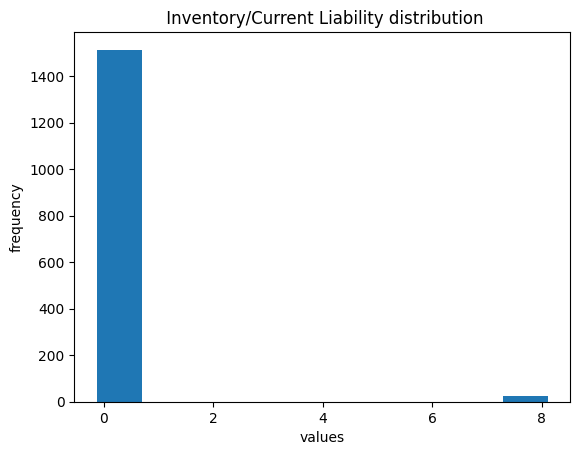

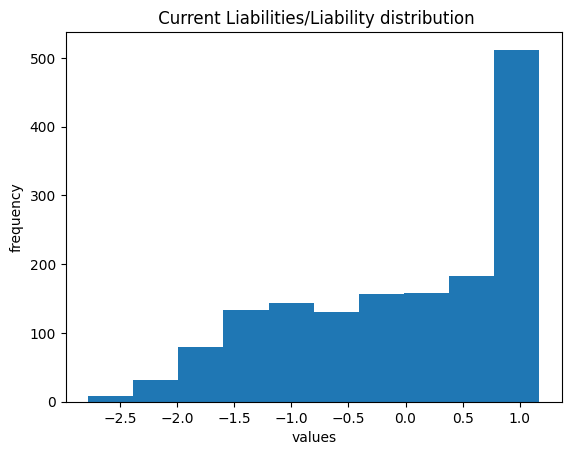

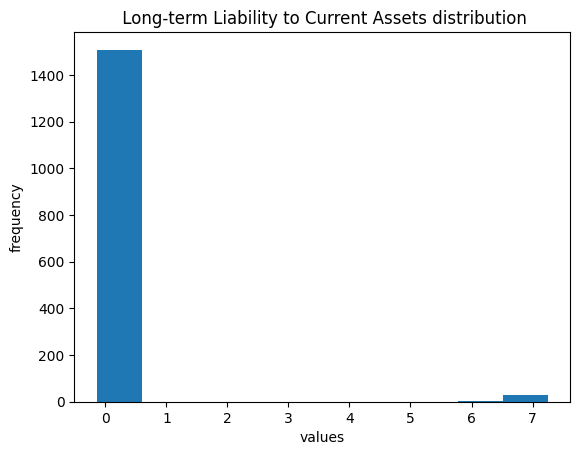

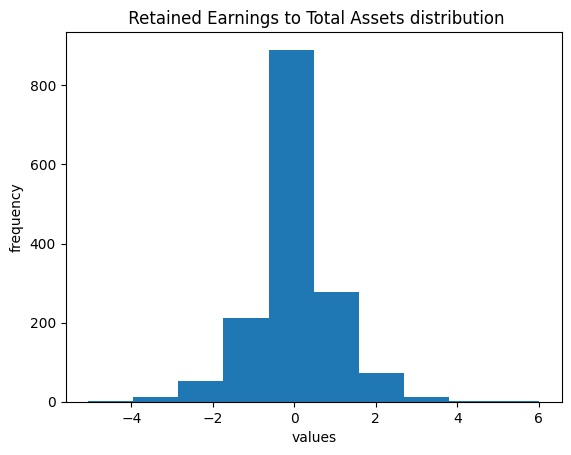

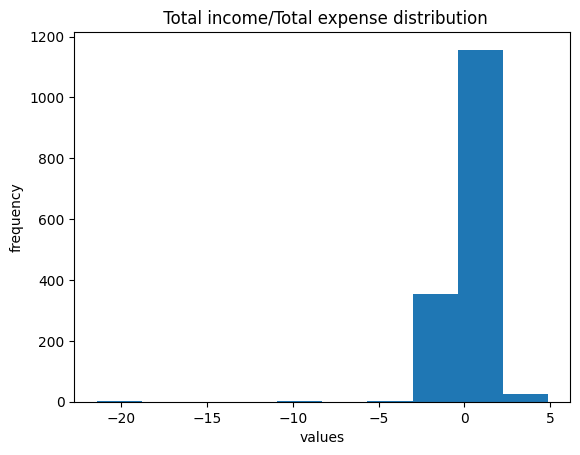

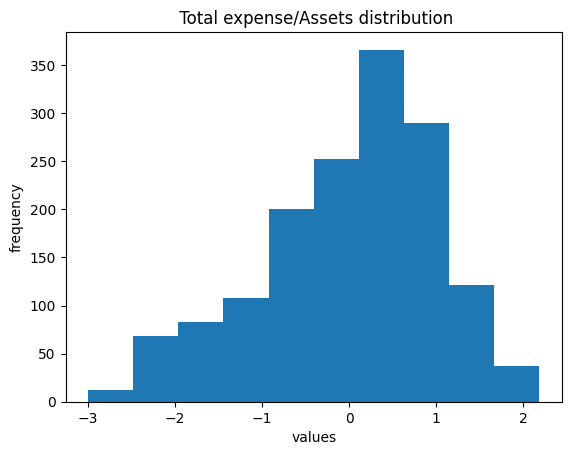

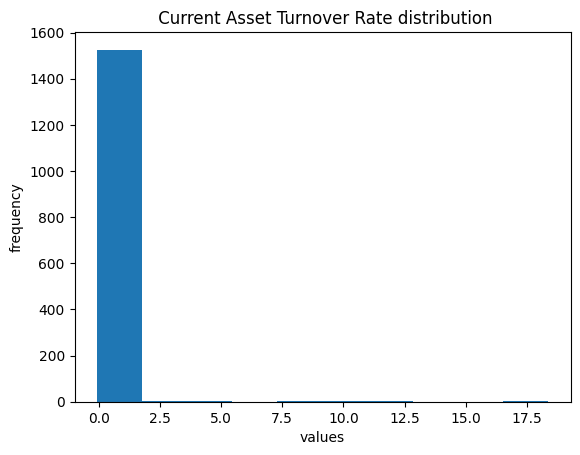

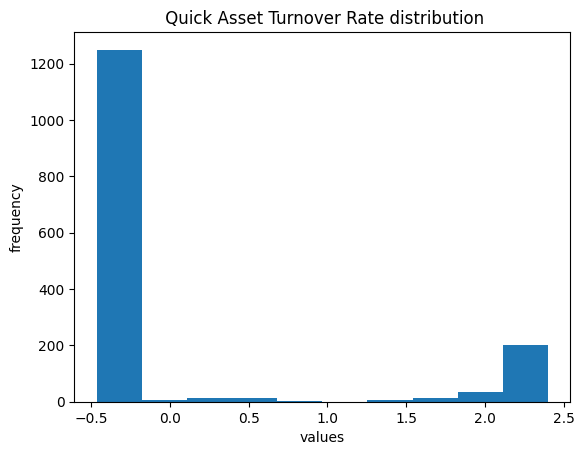

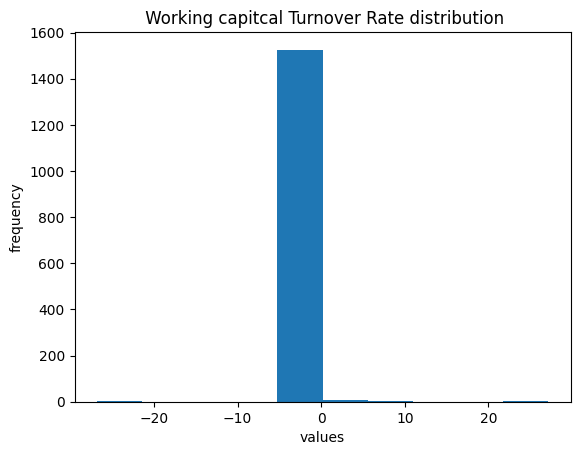

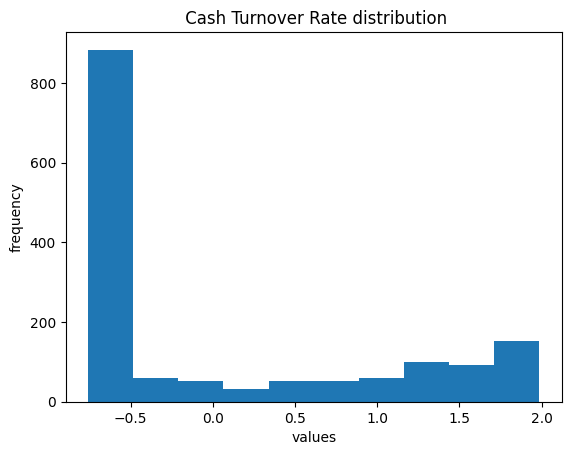

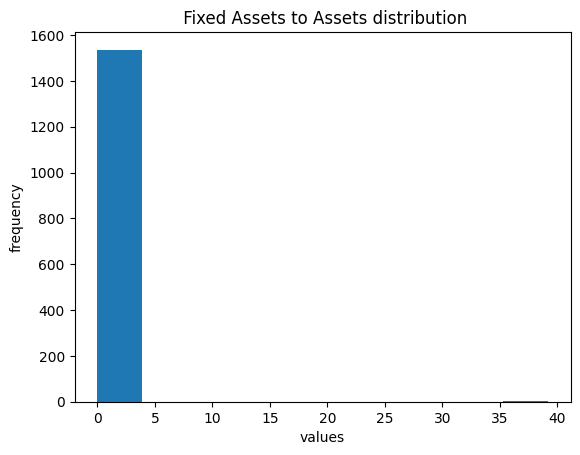

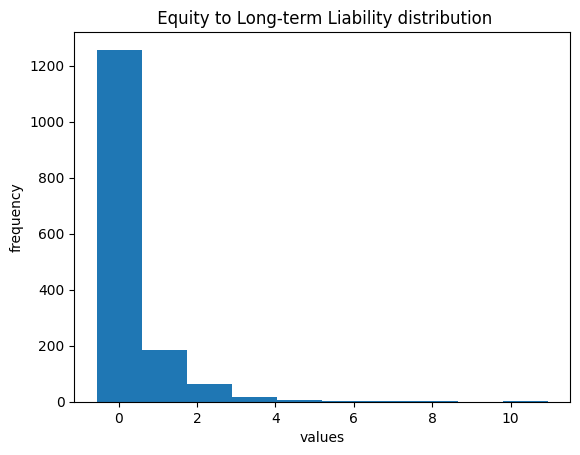

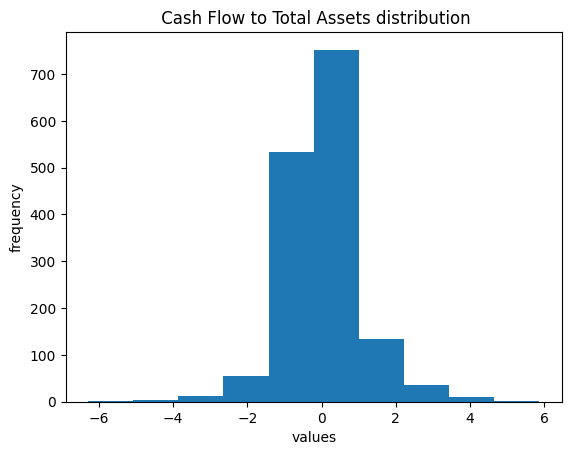

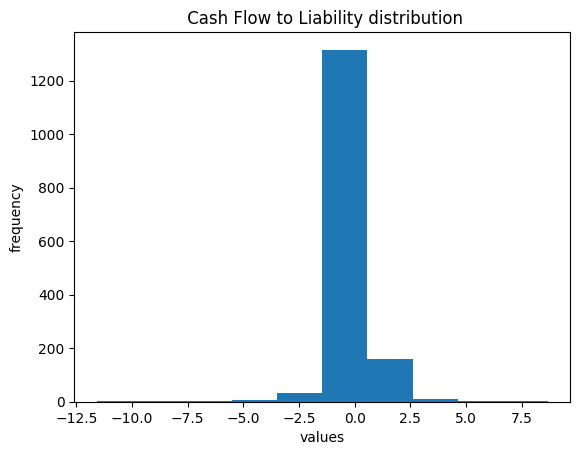

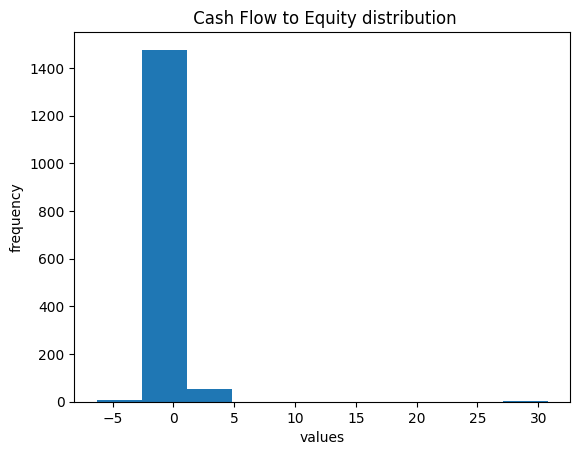

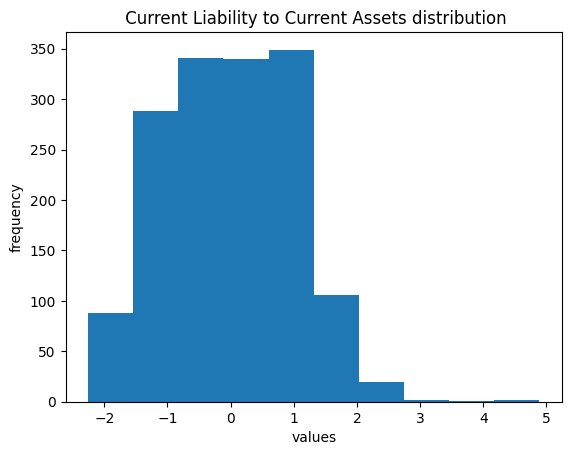

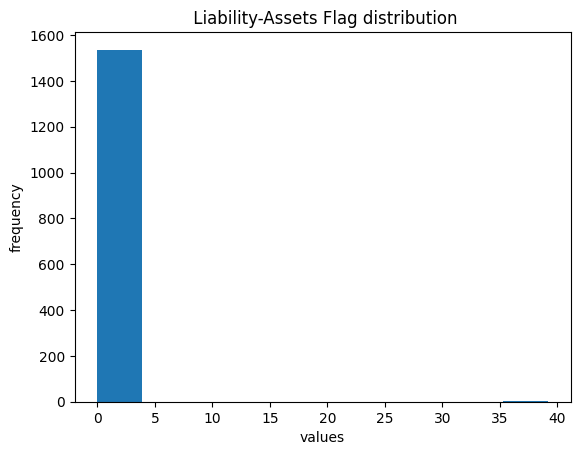

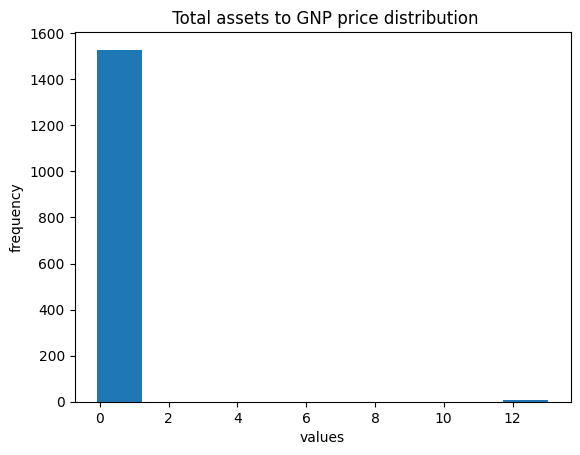

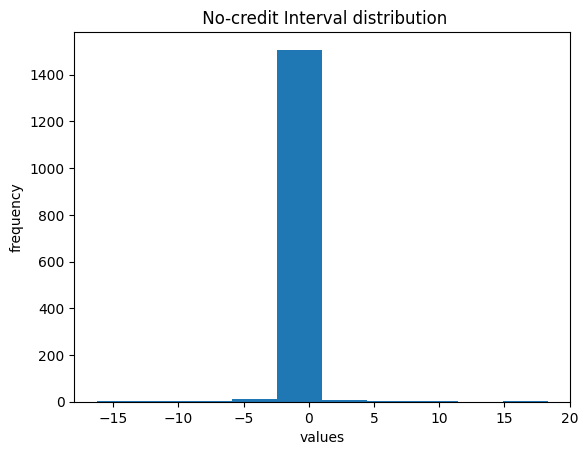

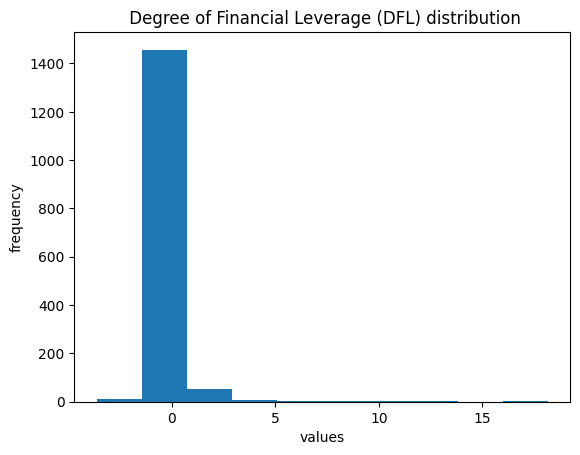

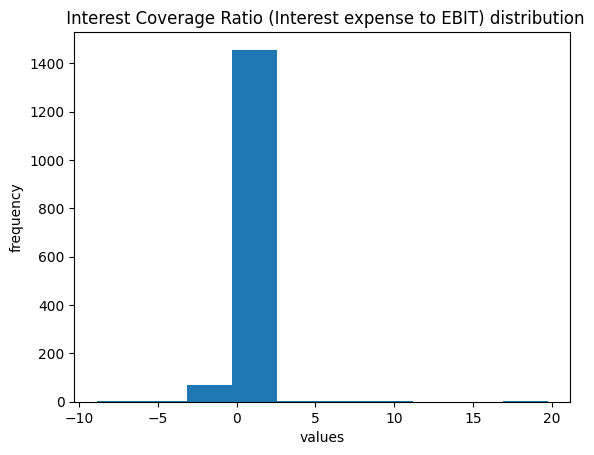

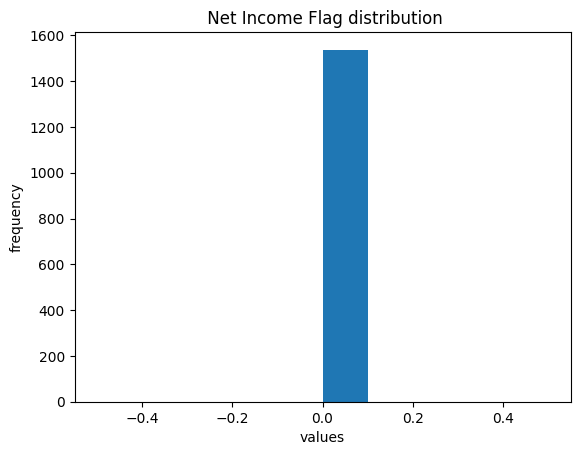

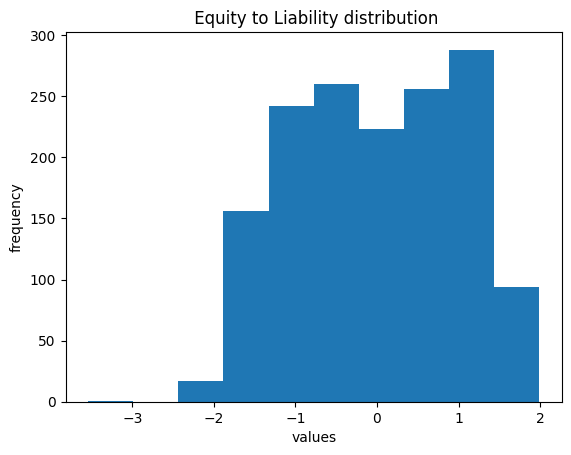

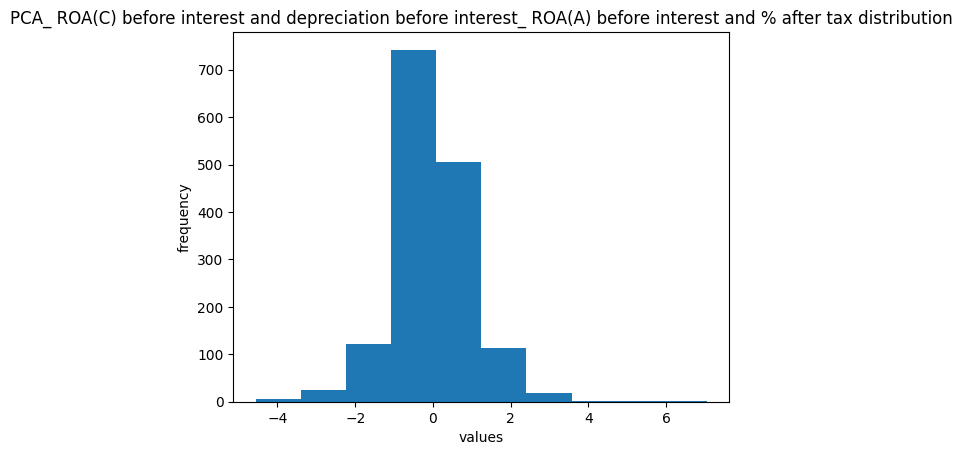

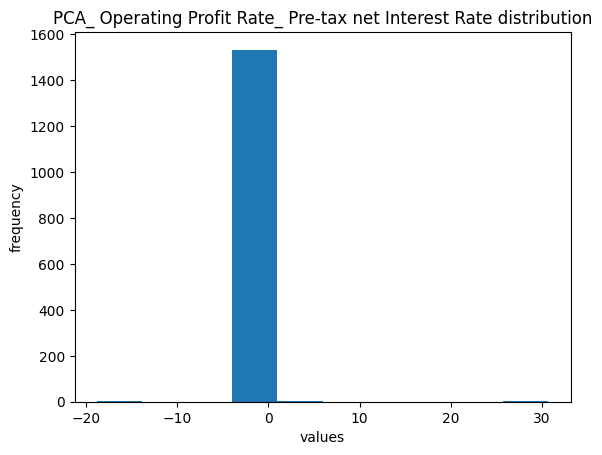

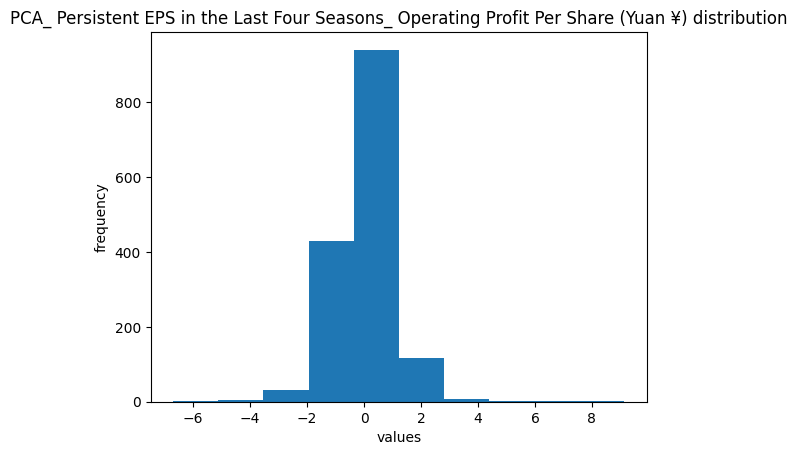

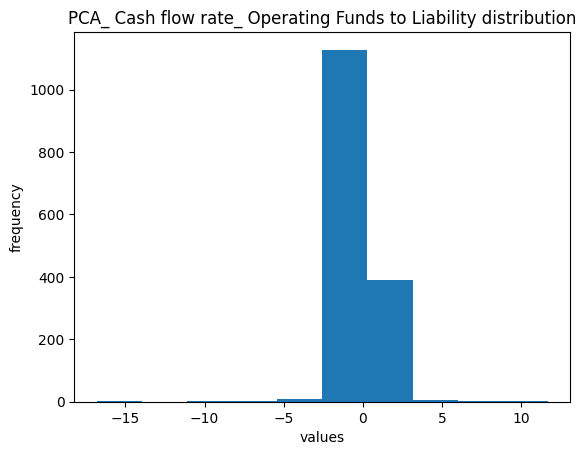

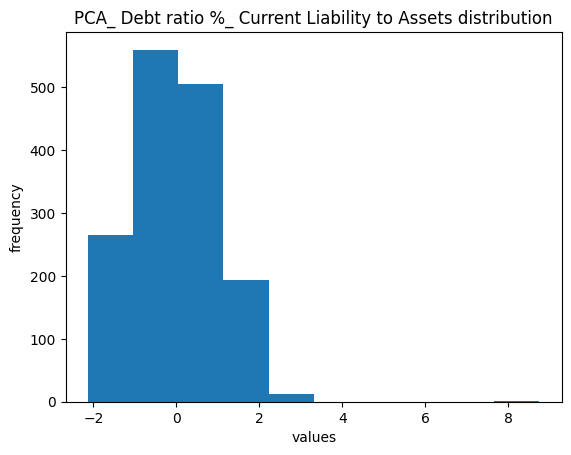

In [10]:
columns=dataset.columns[:-2]
for col in columns:
    plt.hist(dataset[col])
    plt.title(f'{col} distribution')
    plt.ylabel('frequency')
    plt.xlabel('values')
    plt.show()

In [11]:
dataset.columns

Index([' Operating Gross Margin',
       ' Non-industry income and expenditure/revenue',
       ' Operating Expense Rate', ' Research and development expense rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Cash Flow Per Share',
       ' Revenue Per Share (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate',
       ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate',
       ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio',
       ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Long-term fund suitability ratio (A)',
       ' Inventory and accounts receivable/Net value', ' Total Asset Turnover',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Inventory Turnover Rate (times)', ' Fixed Assets Turnover Frequency',
       ' Net Worth Turnov

In [12]:
dataset=dataset.drop(columns=['PCA_ Operating Profit Rate_ Pre-tax net Interest Rate',' Net Income Flag',' Total assets to GNP price',' Liability-Assets Flag',' Fixed Assets to Assets',' Working capitcal Turnover Rate',' Current Asset Turnover Rate',' Inventory/Working Capital',' Cash/Current Liability',' Quick Assets/Current Liability',' Allocation rate per person',' Revenue per person',' Fixed Assets Turnover Frequency',' Average Collection Days',' Accounts Receivable Turnover',' Total debt/Total net worth',' Quick Ratio',' Current Ratio',' Net Value Growth Rate',' Continuous Net Profit Growth Rate',' Realized Sales Gross Profit Growth Rate',' Revenue Per Share (Yuan ¥)',' Non-industry income and expenditure/revenue',' Interest-bearing debt interest rate',' Operating Expense Rate','PCA_ Operating Profit Rate_ Pre-tax net Interest Rate'])

In [13]:
columns=dataset.columns

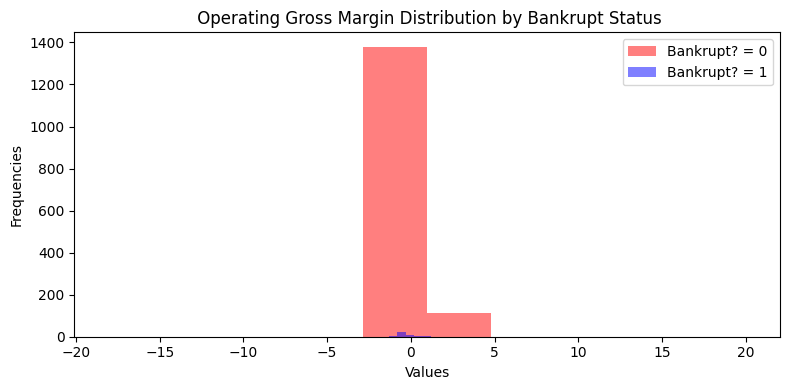

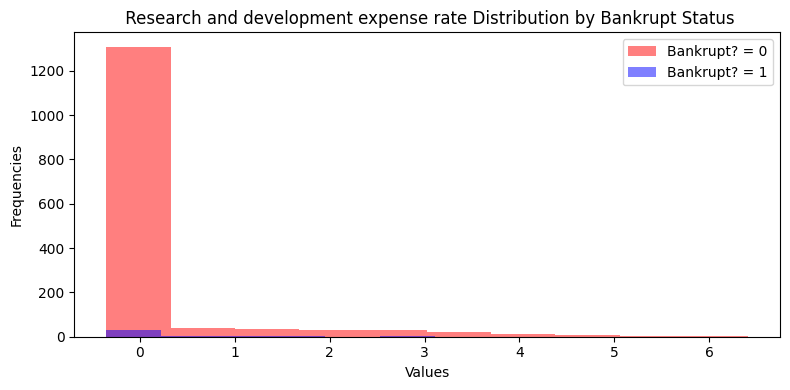

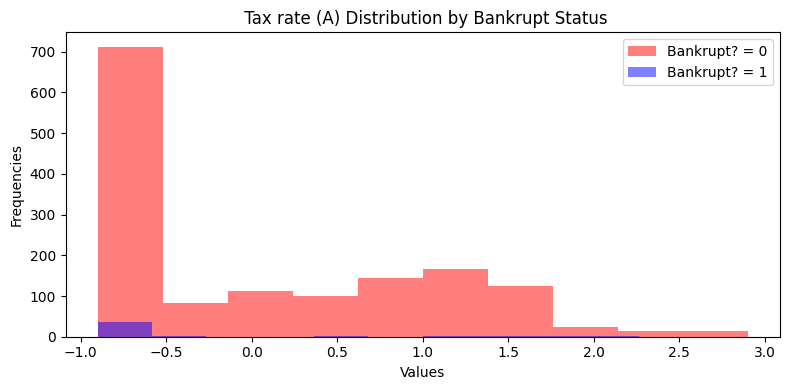

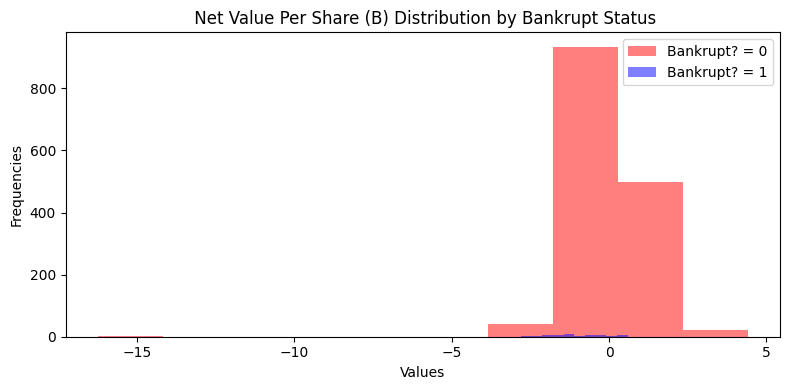

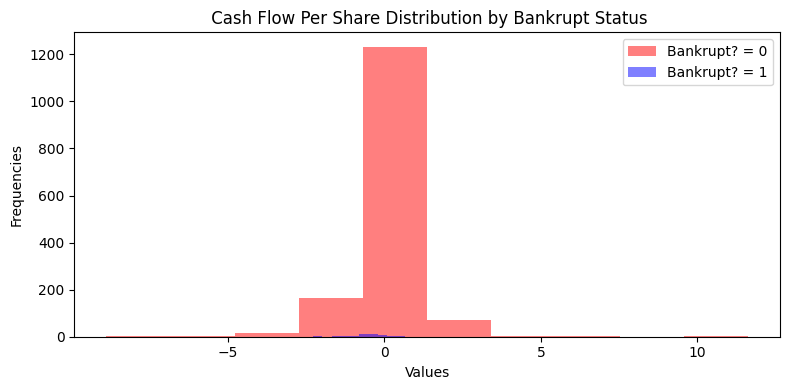

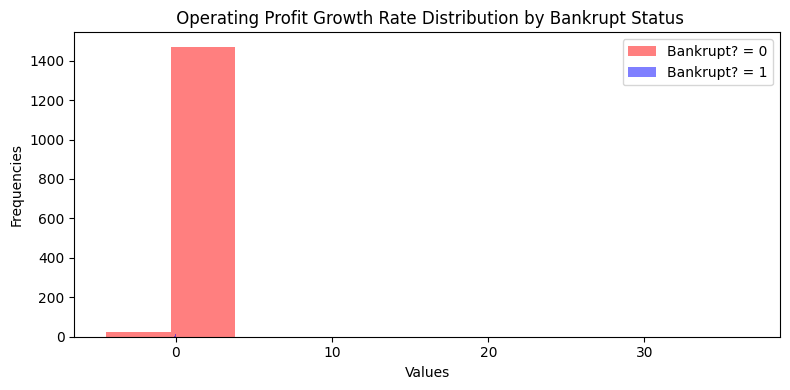

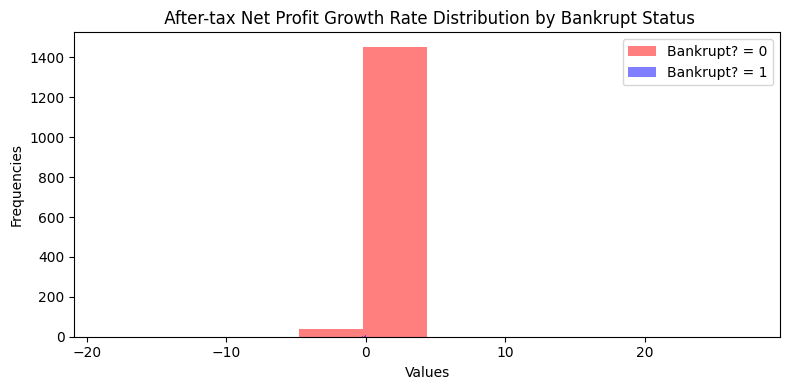

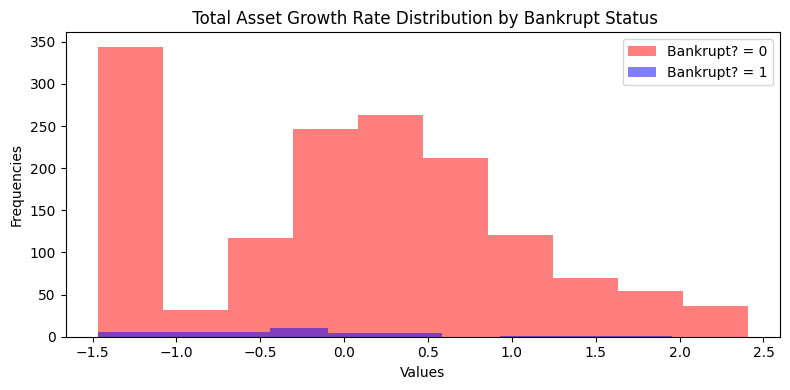

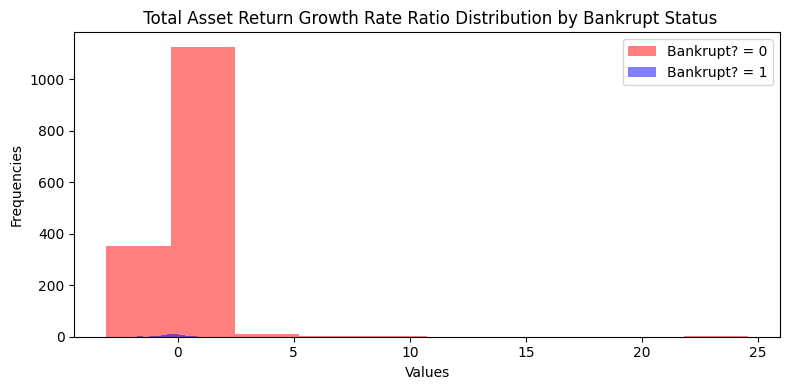

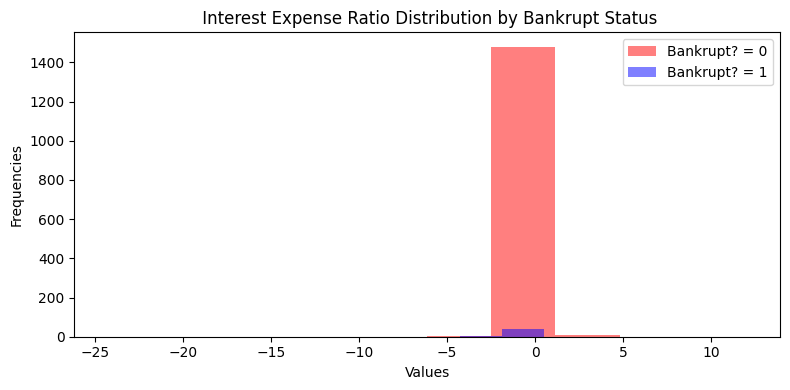

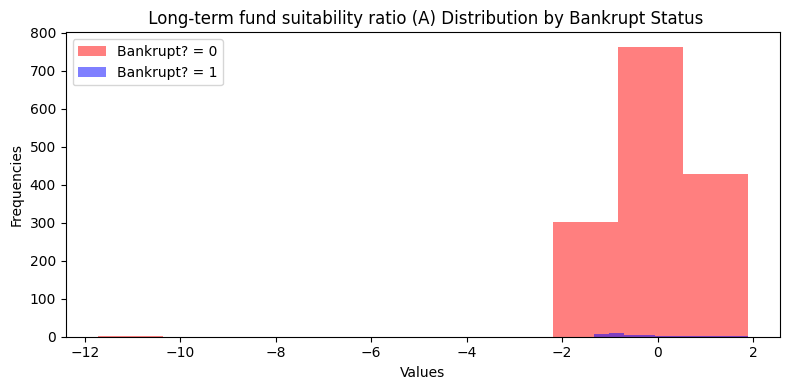

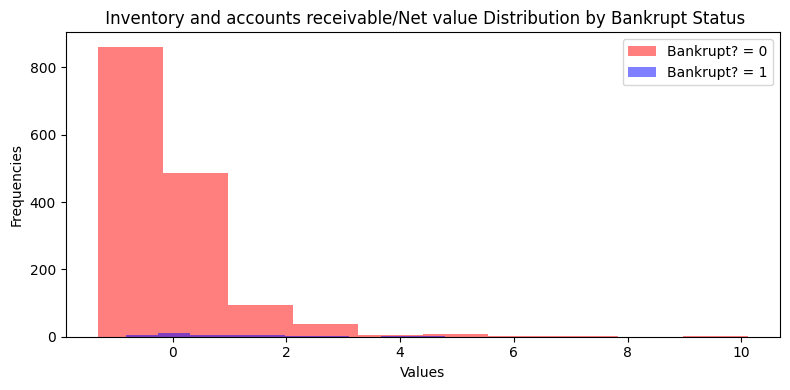

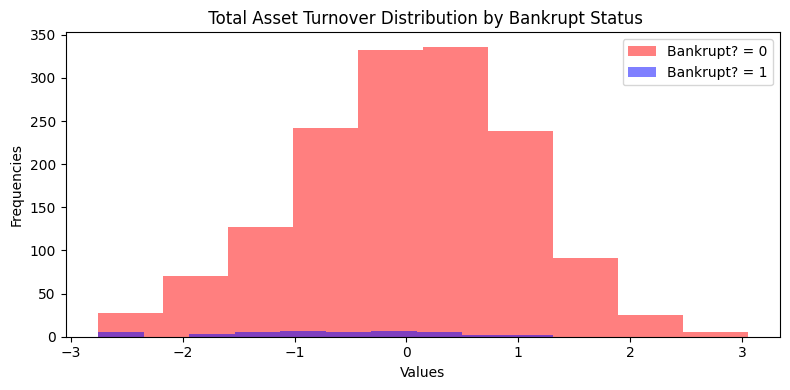

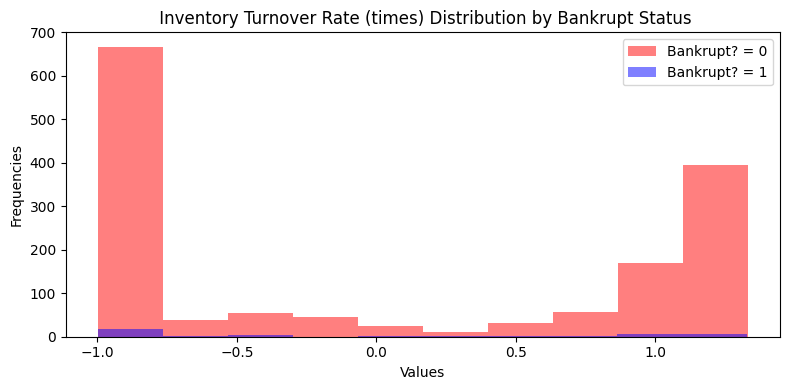

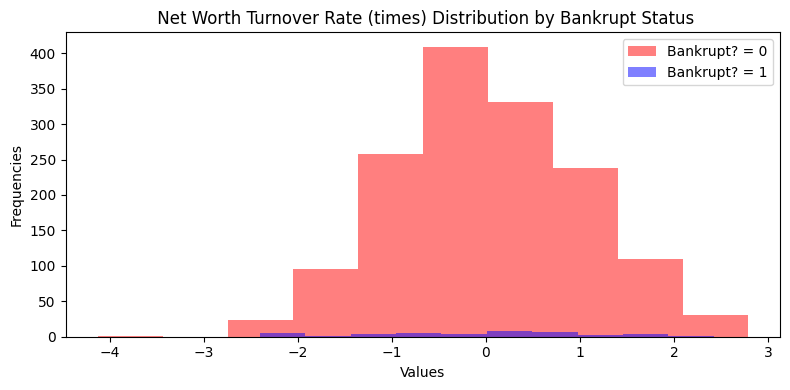

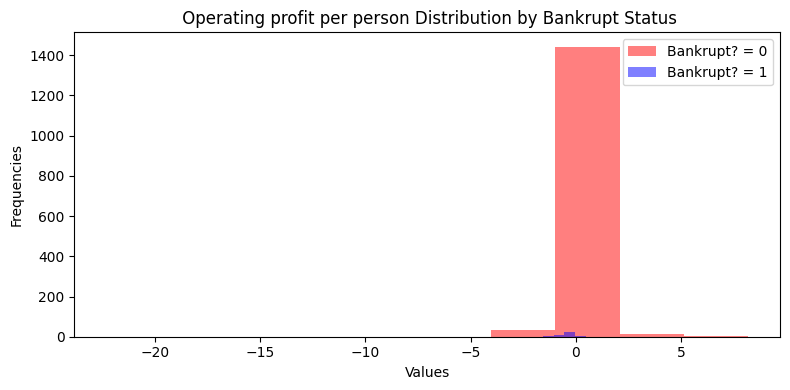

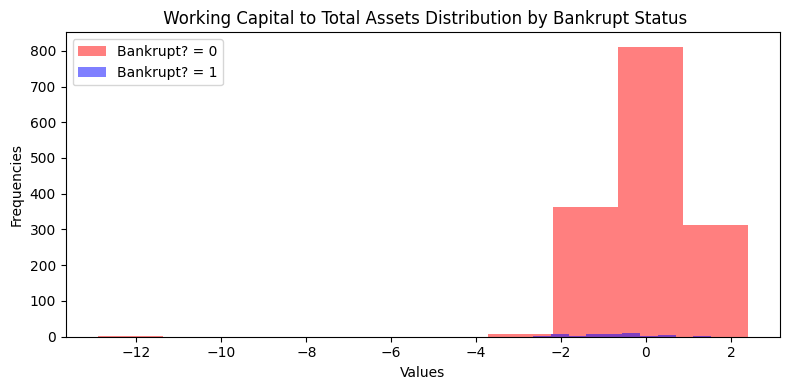

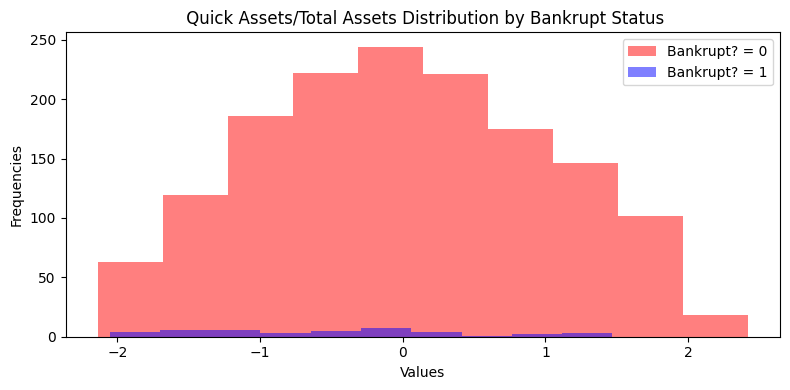

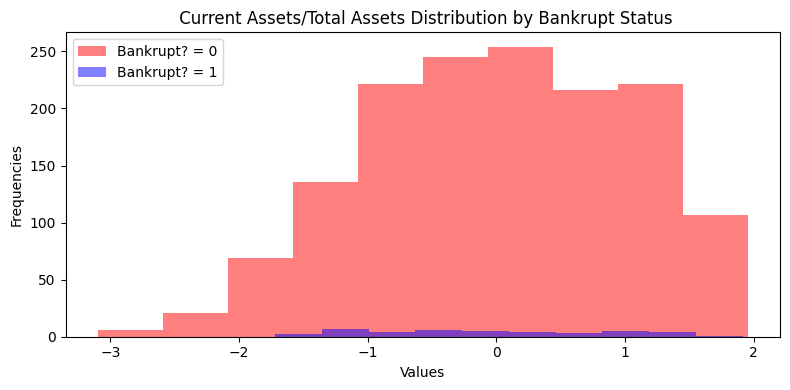

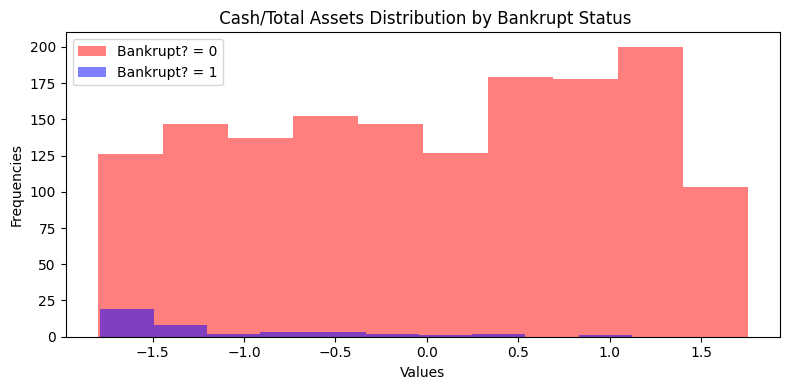

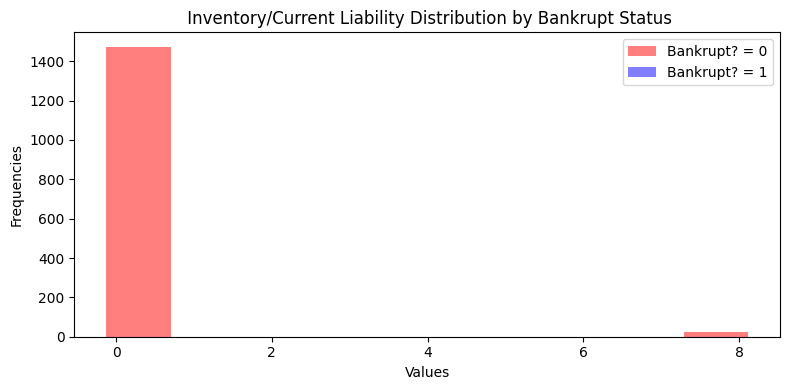

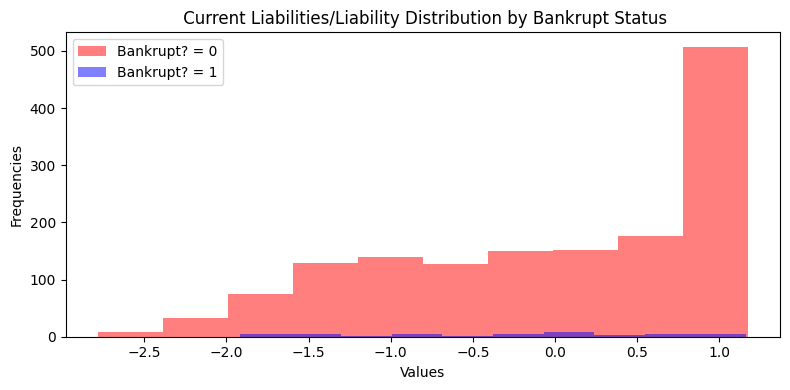

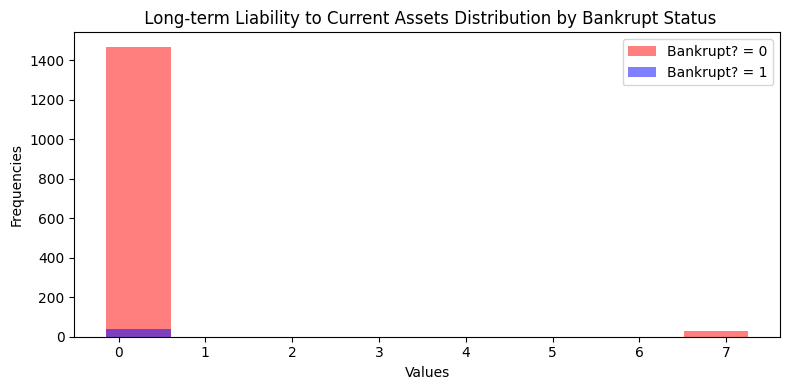

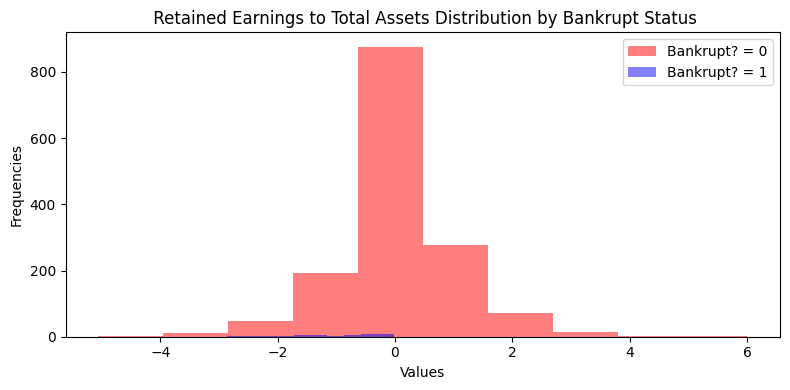

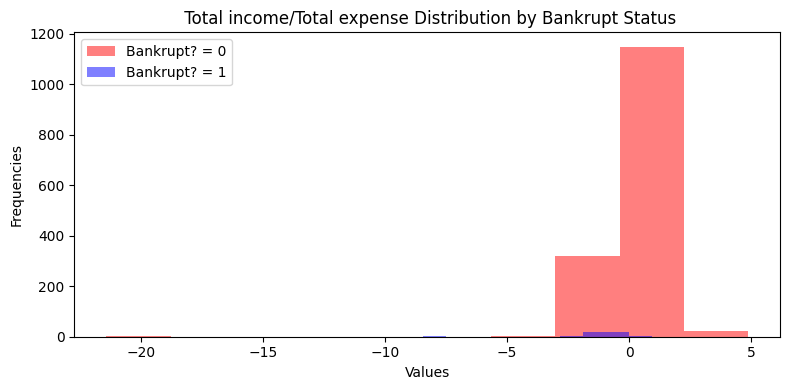

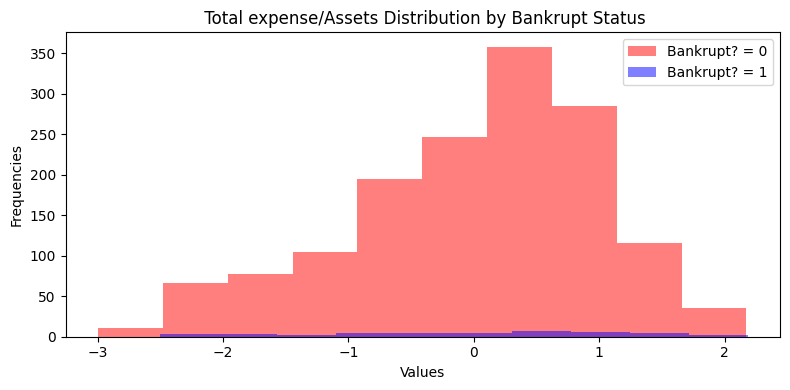

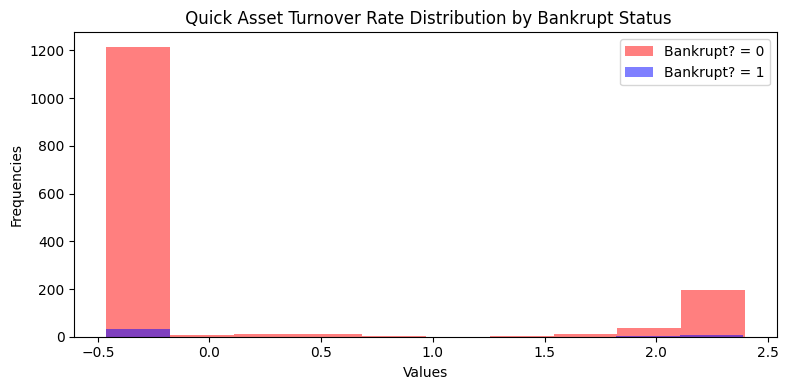

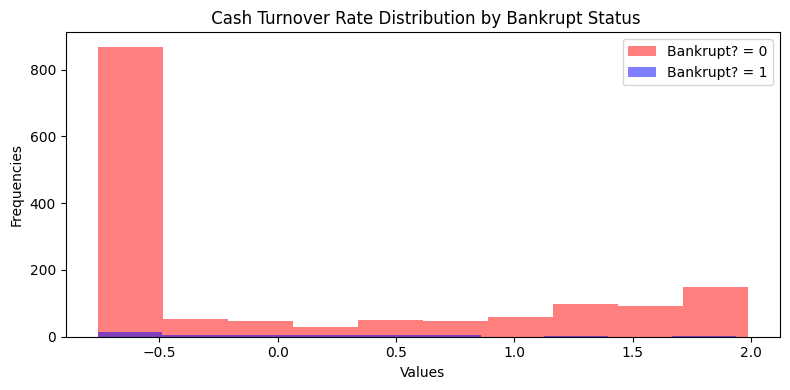

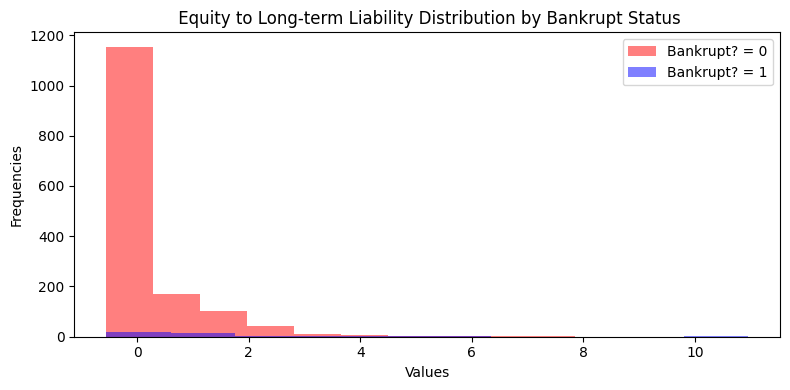

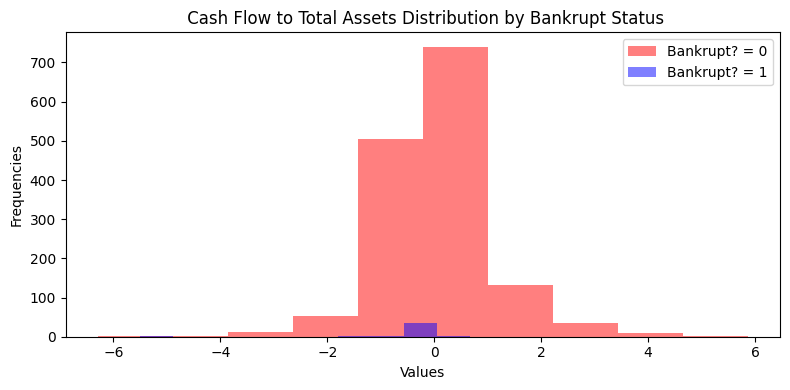

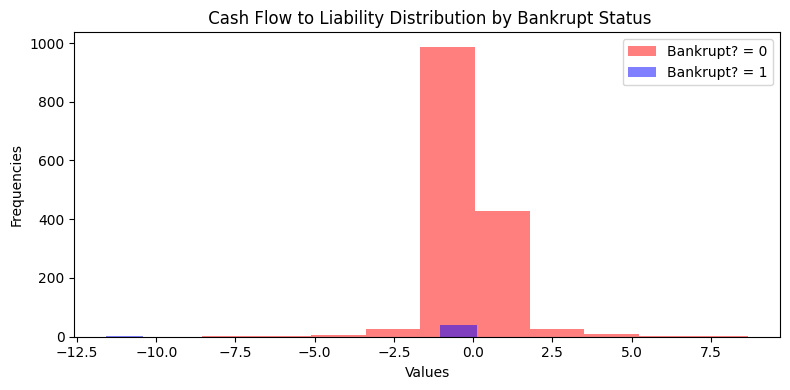

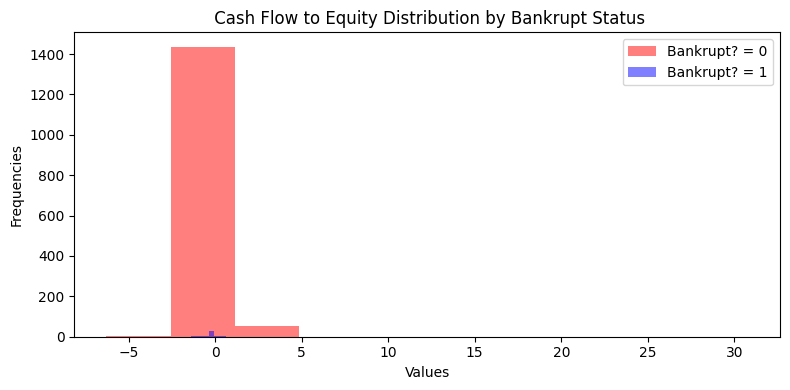

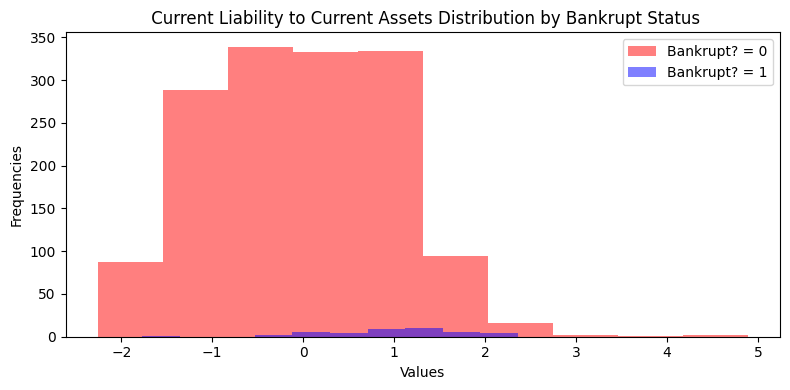

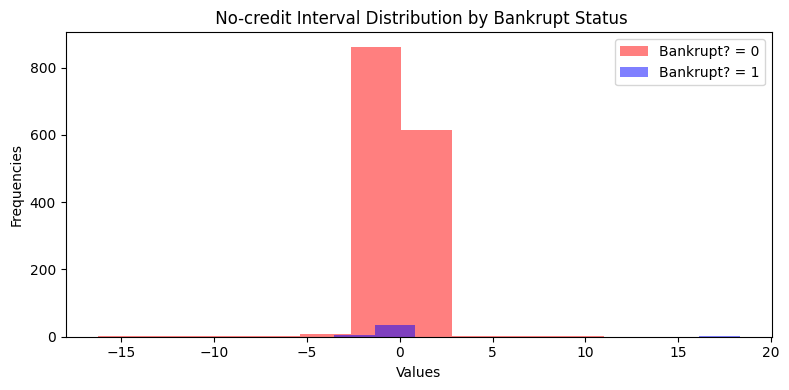

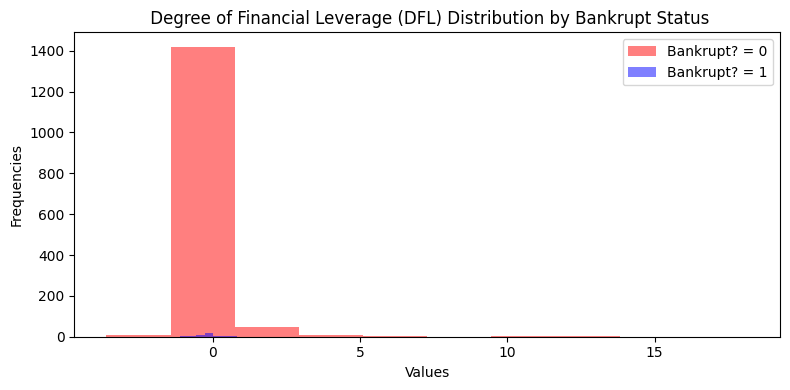

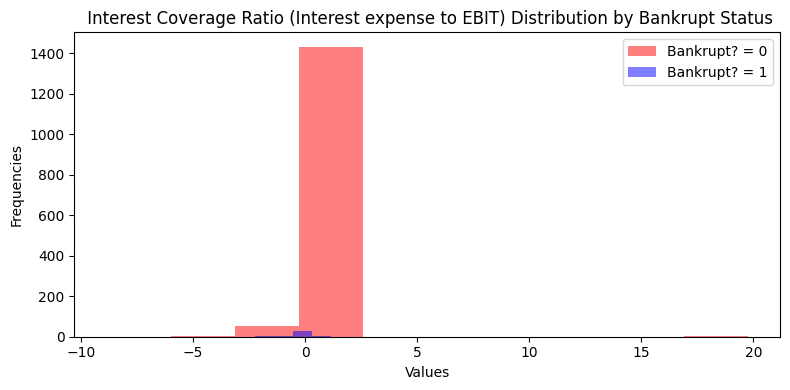

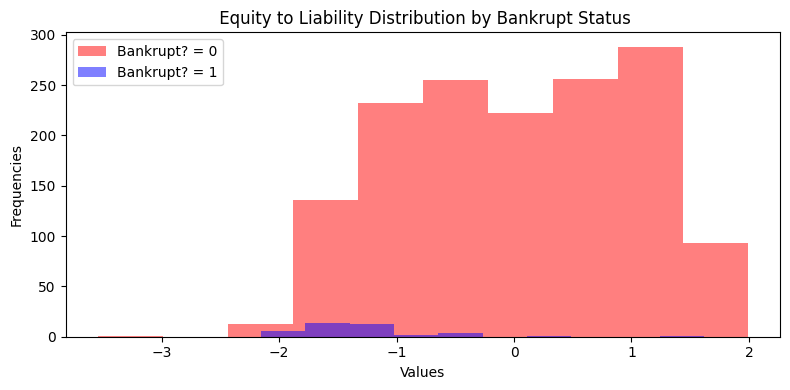

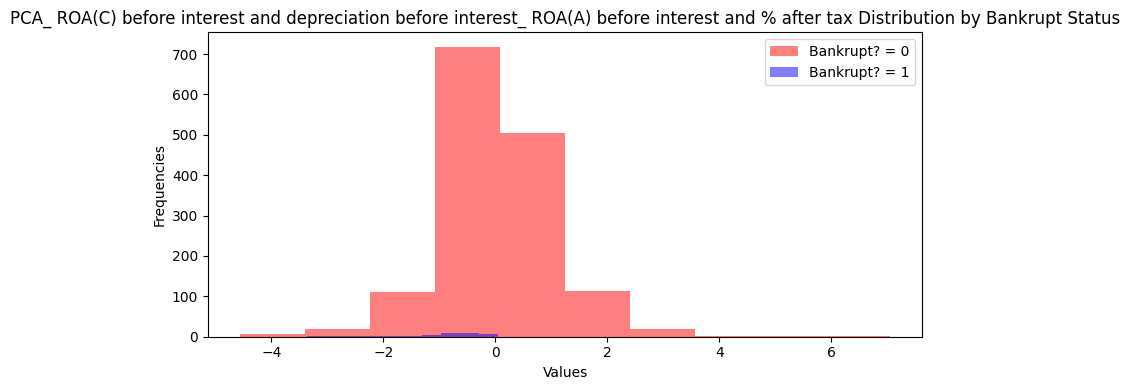

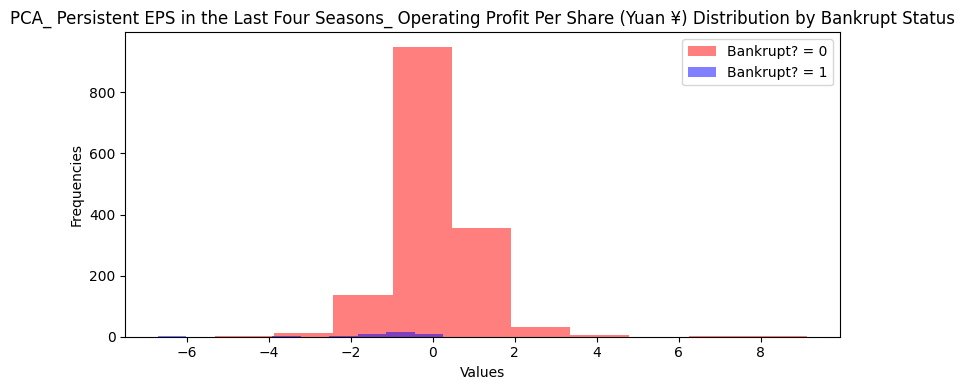

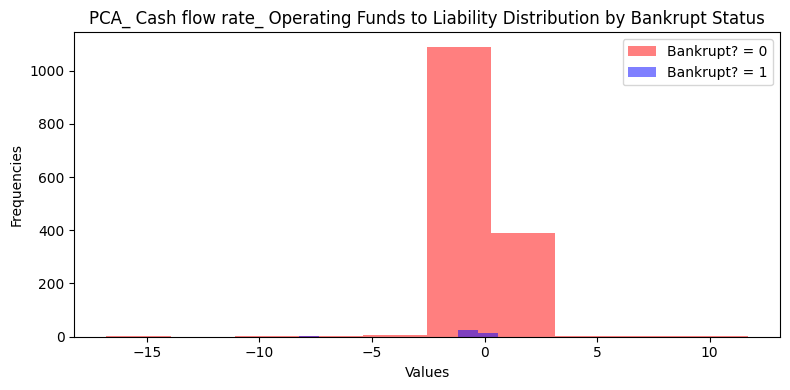

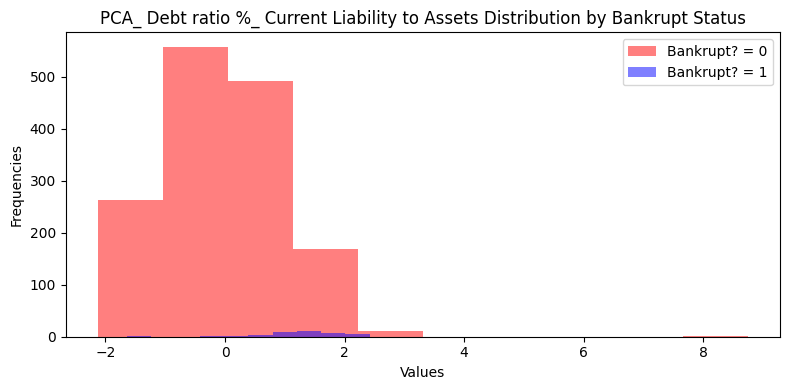

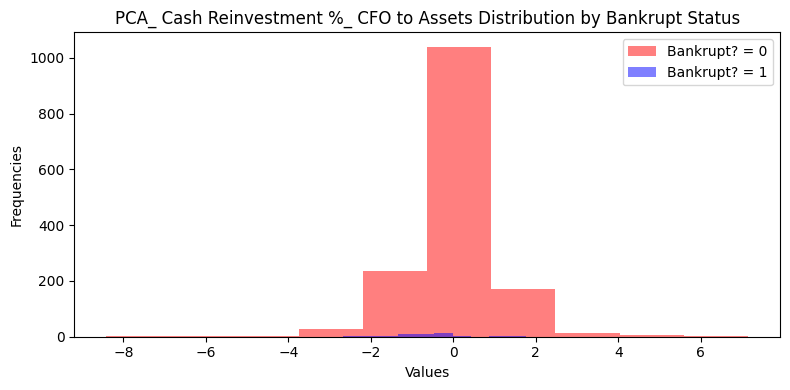

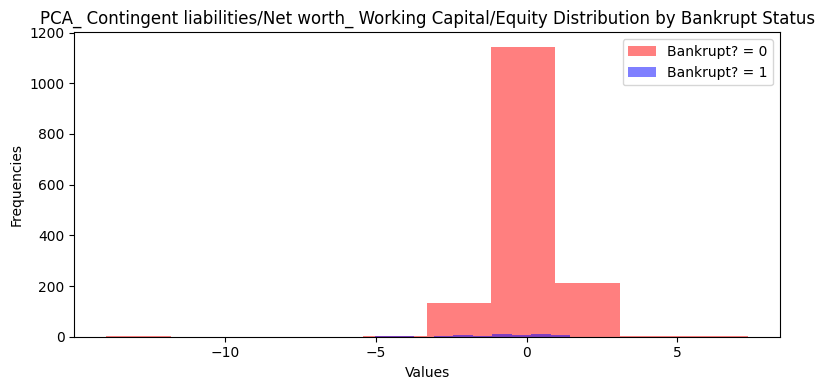

In [14]:
for col in columns:
    plt.figure(figsize=(8, 4))
    for label, color in zip([0, 1], ['red', 'blue']):
        subset = dataset[bankrupt_ == label]
        plt.hist(subset[col], alpha=0.5, color=color, label=f'Bankrupt? = {label}')
        
    plt.title(f'{col} Distribution by Bankrupt Status')
    plt.xlabel('Values')
    plt.ylabel('Frequencies')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

features = dataset.columns.tolist()
feature_pairs = list(combinations(features, 2))  # All unique pairs
num_plots = len(feature_pairs)

# Adjust these depending on how many plots you want per page
plots_per_page = 6
num_pages = (num_plots + plots_per_page - 1) // plots_per_page

for page in range(num_pages):
    start = page * plots_per_page
    end = min(start + plots_per_page, num_plots)
    
    fig, axes = plt.subplots(end - start, 1, figsize=(8, 5 * (end - start)))
    if end - start == 1:
        axes = [axes]
    
    for ax, (feat_x, feat_y) in zip(axes, feature_pairs[start:end]):
        scatter = ax.scatter(
            dataset[feat_x],
            dataset[feat_y],
            c=bankrupt_,
            cmap='coolwarm',
            alpha=0.7,
            edgecolor='k',
            s=50
        )
        ax.set_xlabel(feat_x)
        ax.set_ylabel(feat_y)
        ax.set_title(f'Scatter Plot: {feat_x} vs {feat_y} (Colored by True Class)')
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('Class Label (0 = Not Bankrupt, 1 = Bankrupt)')
    
    plt.tight_layout()
    plt.show()


ModuleNotFoundError: No module named 'seaborn'

#### Correlation Heatmap

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = dataset.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Draw the heatmap
sns.heatmap(corr_matrix, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
dataset.columns

Index(['Quick Assets/Total Assets', 'Equity to Liability',
       'Current Assets/Total Assets', 'Current Liabilities/Liability',
       'Long-term fund suitability ratio (A)', 'Total Asset Growth Rate',
       'PCA_Contingent liabilities/Net worth_Working Capital/Equity',
       'Current Liability to Current Assets', 'Fixed Assets to Assets',
       'PCA_Net Income to Stockholder's Equity_PCA_Borrowing dependency_Current Liabilities/Equity',
       'Cash Flow to Liability',
       'PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax',
       'Total expense/Assets', 'Total income/Total expense',
       'Cash Flow to Equity', 'Cash Flow to Total Assets',
       'No-credit Interval', 'Interest Expense Ratio'],
      dtype='object')

In [ ]:
plt.scatter(dataset['Cash Flow to Equity'],dataset['Cash Flow to Total Assets'],alpha=0.5)
plt.xlabel('Cash Flow to Equity')
plt.ylabel('Cash Flow to Total Assets')
plt.title('Cash Flow to Equity vs Cash Flow to Total Assets')
plt.show()

KeyError: 'Cash Flow to Equity'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import joblib
from collections import defaultdict

def get_corr_pairs(df, threshold_low=0.85, threshold_high=0.95):
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_pairs, pca_pairs = [], []

    for row in upper_tri.index:
        for col in upper_tri.columns:
            corr = upper_tri.loc[row, col] 
            if pd.notna(corr):
                if corr > threshold_high:
                    drop_pairs.append((row, col, corr))
                elif corr > threshold_low:
                    pca_pairs.append((row, col, corr))

    drop_df = pd.DataFrame(drop_pairs, columns=["Feature_1", "Feature_2", "Correlation"])
    pca_df = pd.DataFrame(pca_pairs, columns=["Feature_1", "Feature_2", "Correlation"])
    return drop_df.sort_values(by='Correlation', ascending=False), pca_df.sort_values(by='Correlation', ascending=False)

def filter_unique_pairs(df_corr):
    used, final = set(), []
    for _, row in df_corr.iterrows():
        f1, f2 = row['Feature_1'], row['Feature_2']
        if f1 not in used and f2 not in used:
            final.append(row)
            used.update([f1, f2])
    return pd.DataFrame(final)

def apply_drops(df, drop_df, tracked_drops):
    df_out = df.copy()
    for _, row in drop_df.iterrows():
        f1, f2 = row['Feature_1'], row['Feature_2']
        if f1 in df_out.columns and f2 in df_out.columns:
            tracked_drops.append(f2)
            df_out.drop(columns=[f2], inplace=True)
    return df_out

def apply_pca(df, pairs_df, pca_model_dict):
    df_out = df.copy()
    new_cols = []

    for _, row in pairs_df.iterrows():
        f1, f2 = row['Feature_1'], row['Feature_2']
        if f1 not in df_out.columns or f2 not in df_out.columns:
            continue

        subset = df_out[[f1, f2]].dropna()
        if subset.empty:
            continue

        data = subset.values - subset.values.mean(axis=0)
        pca = PCA(n_components=1).fit(data)
        key = f"{f1}__{f2}"
        pca_model_dict[key] = pca

        new_col = f"PCA_{f1}_{f2}"
        df_out[new_col] = np.nan
        df_out.loc[subset.index, new_col] = pca.transform(data).flatten()
        df_out.drop(columns=[f1, f2], inplace=True)
        new_cols.append(new_col)

    return df_out, new_cols

def hybrid_iterative_reduction(df, thresh_low=0.8, thresh_high=0.95, verbose=False):
    df_iter = df.copy()
    iteration = 1
    all_pca_cols = []
    drop_track = []
    pca_model_dict = defaultdict(PCA)
    all_pca_pairs = []

    while True:
        drop_df, pca_df = get_corr_pairs(df_iter, threshold_low=thresh_low, threshold_high=thresh_high)
        if drop_df.empty and pca_df.empty:
            if verbose:
                print("No more correlated features to process.")
            break

        if verbose:
            print(f"\n--- Iteration {iteration} ---")
            if not drop_df.empty:
                print("Drop Pairs:")
                print(drop_df)
            if not pca_df.empty:
                print("PCA Pairs:")
                print(pca_df)

        if not drop_df.empty:
            df_iter = apply_drops(df_iter, drop_df, drop_track)

        if not pca_df.empty:
            unique_pca_df = filter_unique_pairs(pca_df)
            df_iter, new_pca_cols = apply_pca(df_iter, unique_pca_df, pca_model_dict)
            all_pca_pairs.append(unique_pca_df)
            all_pca_cols.extend(new_pca_cols)

        iteration += 1

    return df_iter.reset_index(drop=True), all_pca_cols, drop_track, all_pca_pairs, pca_model_dict


final_df, pca_features, dropped_cols, all_pca_pairs, pca_models = hybrid_iterative_reduction(
    dataset,
    thresh_low=0.9,
    thresh_high=0.95,
    verbose=True
)

if all_pca_pairs:
    pca_pairs_df = pd.concat(all_pca_pairs, ignore_index=True)
else:
    pca_pairs_df = pd.DataFrame(columns=["Feature_1", "Feature_2", "Correlation"])

import os
import joblib

# Ensure output directory exists
os.makedirs('output', exist_ok=True)

# Save all transformation metadata for test/inference
joblib.dump(dropped_cols, 'output/columns_to_drop.pkl')
joblib.dump(pca_pairs_df, 'output/pca_pairs_used.pkl')
joblib.dump(pca_models, 'output/fitted_pca_models.pkl')

print("\n✅ All PCA transformation artifacts saved.")


--- Iteration 1 ---
Drop Pairs:
             Feature_1                  Feature_2  Correlation
0  Cash Flow to Equity  Cash Flow to Total Assets     0.981043
No more correlated features to process.

✅ All PCA transformation artifacts saved.


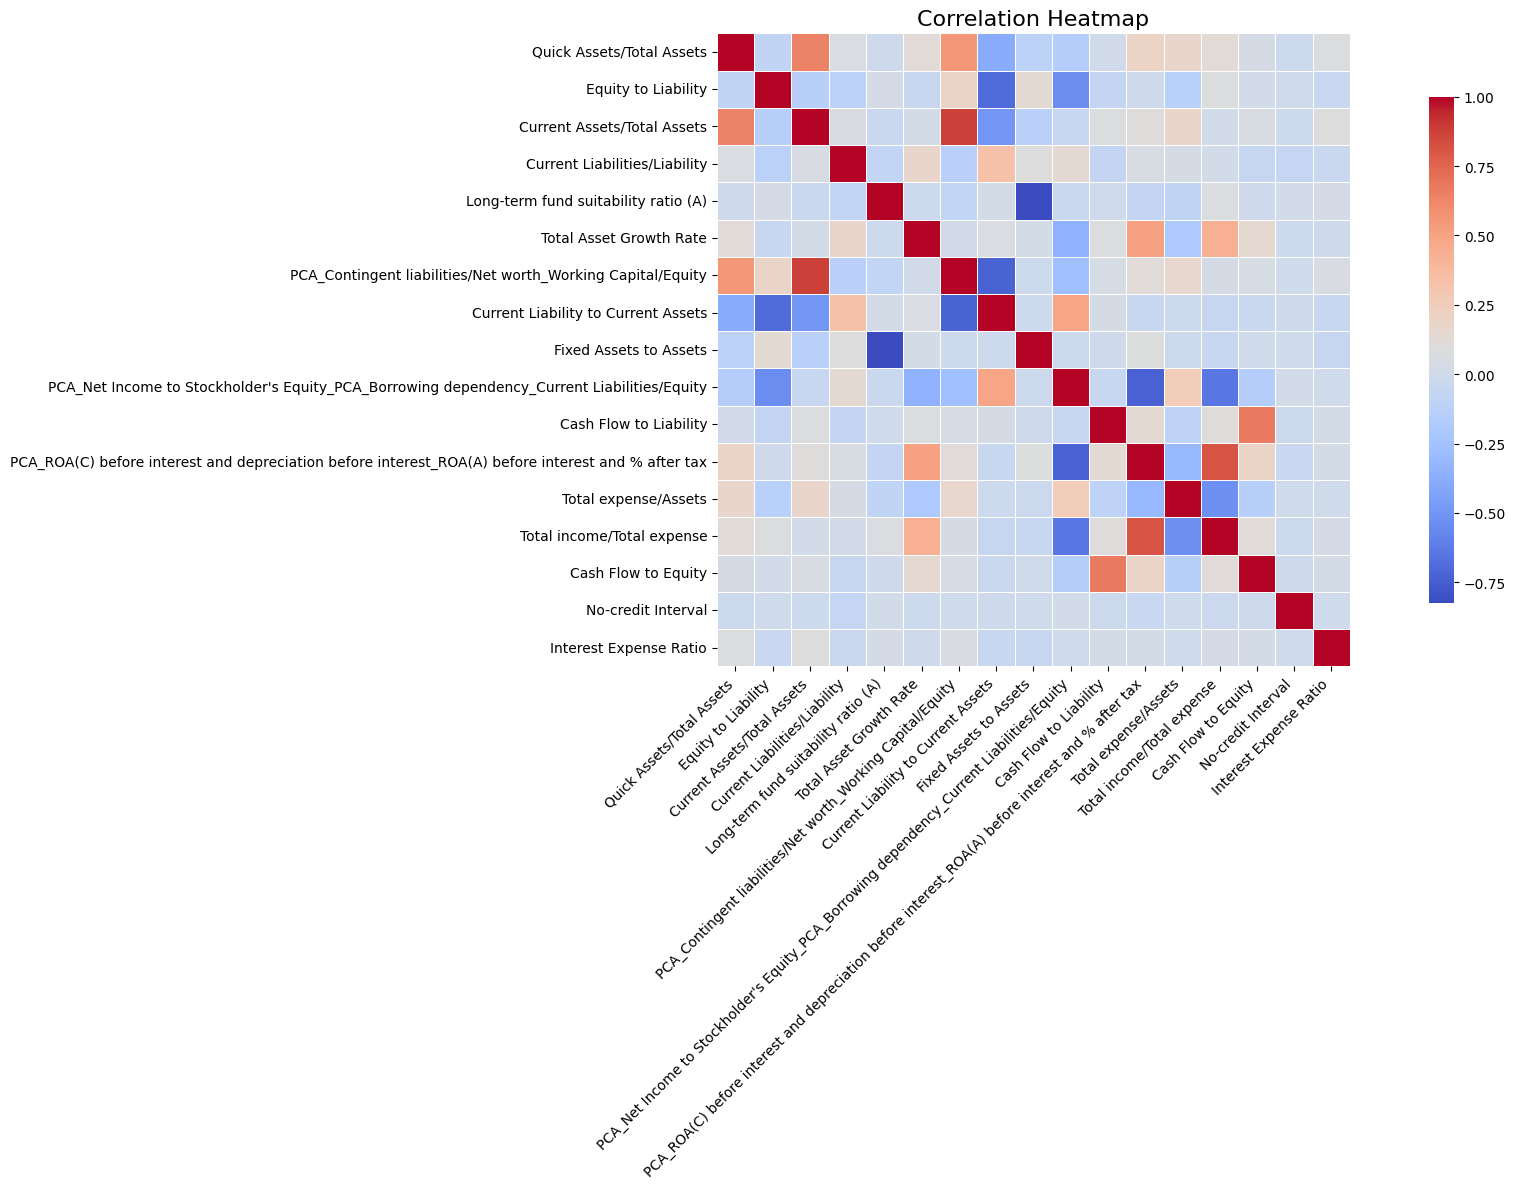

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = final_df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Draw the heatmap
sns.heatmap(corr_matrix, 
            fmt=".2f", 
            cmap='coolwarm', 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.8})

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
final_df.columns

Index(['Quick Assets/Total Assets', 'Equity to Liability',
       'Current Assets/Total Assets', 'Current Liabilities/Liability',
       'Long-term fund suitability ratio (A)', 'Total Asset Growth Rate',
       'PCA_Contingent liabilities/Net worth_Working Capital/Equity',
       'Current Liability to Current Assets', 'Fixed Assets to Assets',
       'PCA_Net Income to Stockholder's Equity_PCA_Borrowing dependency_Current Liabilities/Equity',
       'Cash Flow to Liability',
       'PCA_ROA(C) before interest and depreciation before interest_ROA(A) before interest and % after tax',
       'Total expense/Assets', 'Total income/Total expense',
       'Cash Flow to Equity', 'No-credit Interval', 'Interest Expense Ratio'],
      dtype='object')

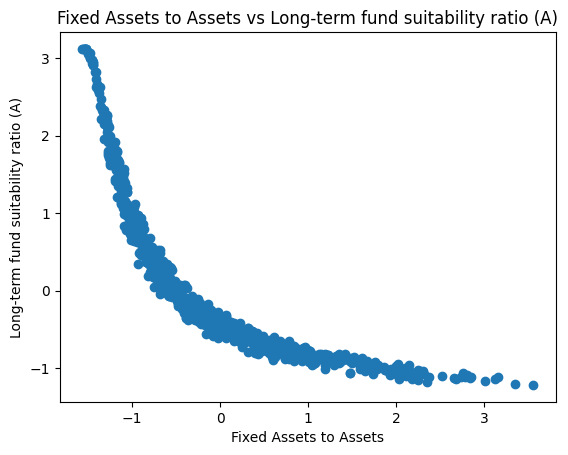

In [ ]:
plt.scatter(final_df['Fixed Assets to Assets'],final_df['Long-term fund suitability ratio (A)'])
plt.ylabel('Long-term fund suitability ratio (A)')
plt.xlabel('Fixed Assets to Assets')
plt.title('Fixed Assets to Assets vs Long-term fund suitability ratio (A)')
plt.show()

In [ ]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

X_svr_temp=final_df[['Fixed Assets to Assets','Long-term fund suitability ratio (A)']].values
y_svr_temp = final_df[['Long-term fund suitability ratio (A)']].values

model = SVR(kernel='rbf', C=1000, epsilon=0.01)
model.fit(X_svr_temp, y_svr_temp)

compressed_feature = model.predict(X_svr_temp)


c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


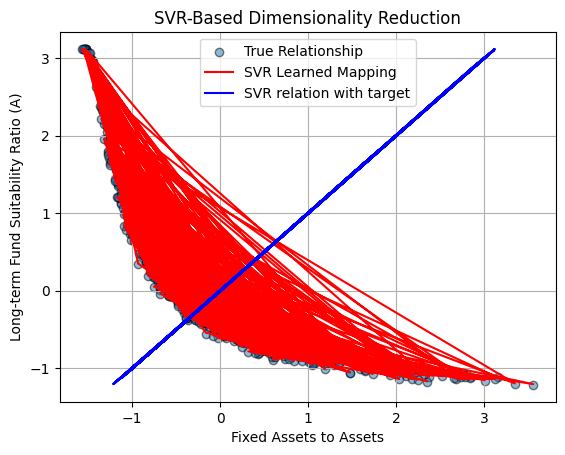

In [ ]:
plt.scatter(X_svr_temp[:,0], y_svr_temp, label='True Relationship', alpha=0.5, edgecolor='k')
plt.plot(X_svr_temp[:,0], compressed_feature, color='red', label='SVR Learned Mapping')
plt.plot(y_svr_temp,compressed_feature,color='blue',label='SVR relation with target')
plt.xlabel('Fixed Assets to Assets')
plt.ylabel('Long-term Fund Suitability Ratio (A)')
plt.title('SVR-Based Dimensionality Reduction')
plt.legend()
plt.grid(True)
plt.show()

<Axes: ylabel='Density'>

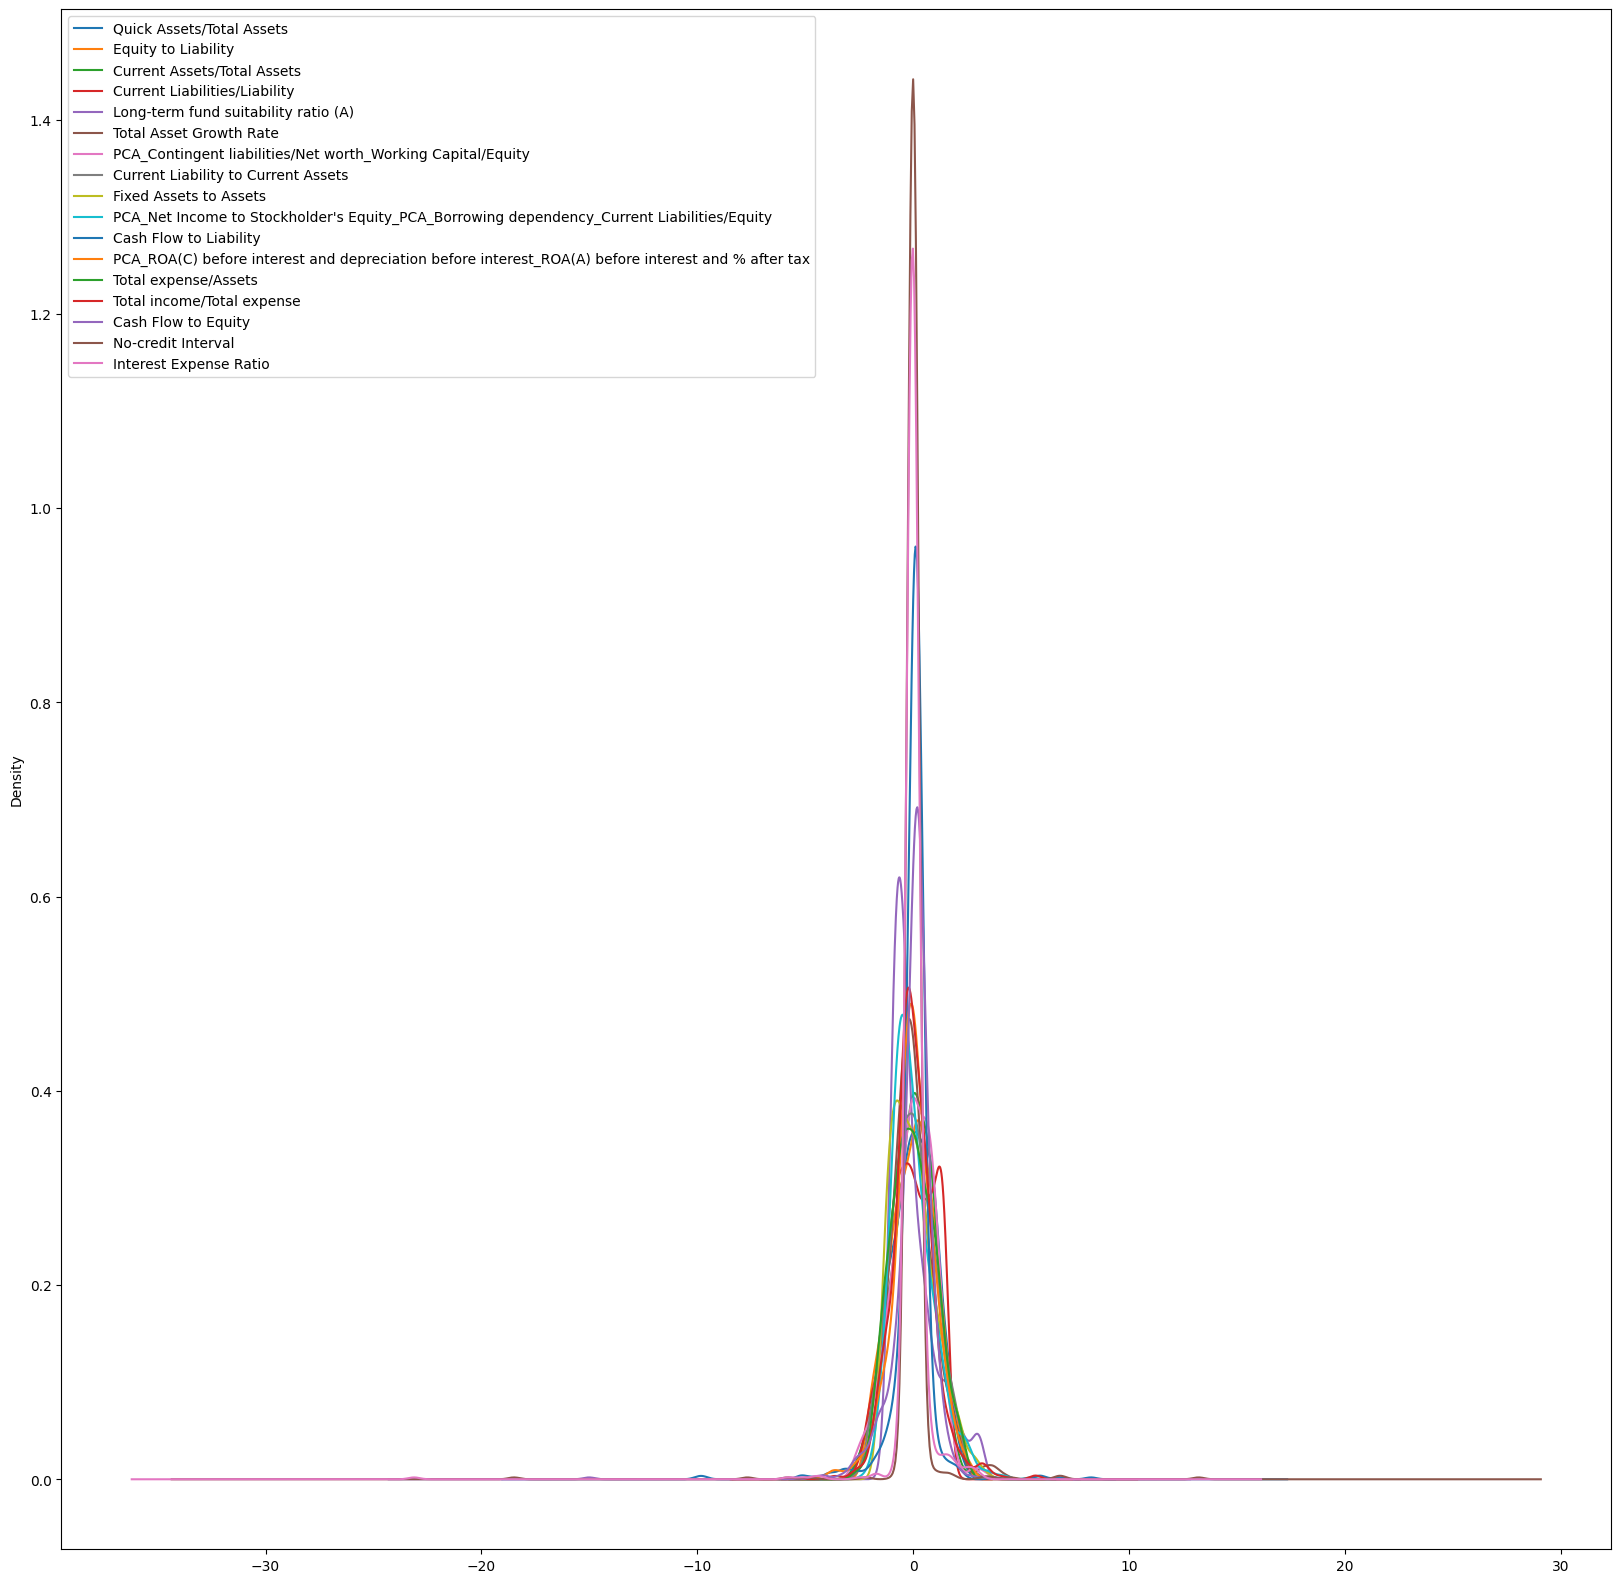

In [ ]:
final_df.plot.kde(figsize=(20,20))

### Splitting the dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # Changed to SMOTE

X = final_df.values
print(X[:5, :])
y = bankrupt_.values
print(y[:5])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=33, shuffle=True, stratify=y
)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


[[-1.31381275 -1.42790236 -0.04994474  0.87678092 -0.94381447 -0.22177852
  -0.53120936  1.22477835  1.05493848  2.2087052   0.14749262 -0.54589187
  -1.01362147 -0.53340573  0.31038688 -0.06647599  1.78276739]
 [ 1.28320989  1.51940986  0.64915918  1.06197434 -0.84637667 -0.43058541
   0.91865299 -1.43242426  1.33431672 -1.33921256  0.08880293  1.4002366
  -1.60399225  2.44324878  0.12033793 -0.08277682 -0.06315726]
 [ 0.00626239 -0.0540994  -0.35750842  0.85698822  2.5515299   0.24127347
  -0.76665307  0.51116352 -1.37456204  0.18049328  0.18690259 -0.36653332
  -1.5528134   0.14793996  0.31162588  0.02683076 -0.04323484]
 [ 0.2317403   0.77832706 -0.09606629  0.14508365 -0.14761975  0.4443036
   0.22363601 -0.56518139 -0.28975736 -0.35035505  0.81223195 -0.39387836
   0.41758127 -0.46223582  1.06740546 -0.01002593 -0.06315726]
 [-0.58430436 -0.24737325 -0.36325043 -0.35041402 -0.7333289   0.28123247
  -0.47652324  0.3401797   0.55553839  0.05036135  0.04561076  0.09588282
   0.21794

#### XGBoost Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from scipy.stats import randint, uniform

# Compute scale_pos_weight from resampled training data
scale_pos_weight = np.bincount(y_train)[0] / np.bincount(y_train)[1] * 1.5

# Define parameter search space
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
    'reg_lambda': uniform(0, 5),
    'scale_pos_weight': [scale_pos_weight]  # keep this fixed
}

# Define base classifier
xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Stratified CV setup for tuning
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,  # increase for more thorough search
    scoring='accuracy',
    n_jobs=-1,
    cv=cv_strategy,
    verbose=2,
    random_state=42
)

print("🔍 Performing hyperparameter tuning with RandomizedSearchCV...\n")
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_
print("\n✅ Best Hyperparameters:")
print(random_search.best_params_)

# Evaluate on test set
y_test_pred = best_xgb.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, digits=4))


🔍 Performing hyperparameter tuning with RandomizedSearchCV...

Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best Hyperparameters:
{'colsample_bytree': 0.7801997007878172, 'gamma': 0.06632480579933264, 'learning_rate': 0.29266052670545584, 'max_depth': 8, 'n_estimators': 291, 'reg_lambda': 1.9270825126995805, 'scale_pos_weight': 93.44999999999999, 'subsample': 0.6063865008880857}

Classification Report on Test Set:
              precision    recall  f1-score   support

           0     0.9811    1.0000    0.9905       156
           1     0.0000    0.0000    0.0000         3

    accuracy                         0.9811       159
   macro avg     0.4906    0.5000    0.4952       159
weighted avg     0.9626    0.9811    0.9718       159



c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:41:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_En

✅ New best AP: 0.6592 with {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8, 'colsample_bytree': 0.8}
✅ New best AP: 0.6890 with {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8, 'colsample_bytree': 0.8}

📈 Final ROC-AUC Score: 0.7261
📊 Final Average Precision Score: 0.6890
🎯 Precision@5: 1.0000
🎯 Precision@10: 1.0000
🎯 Precision@20: 0.7500


C:\Users\aadit\AppData\Local\Temp\ipykernel_9612\1262439294.py:102: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\aadit\Anaconda\envs\AaHB_CS556B_Env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


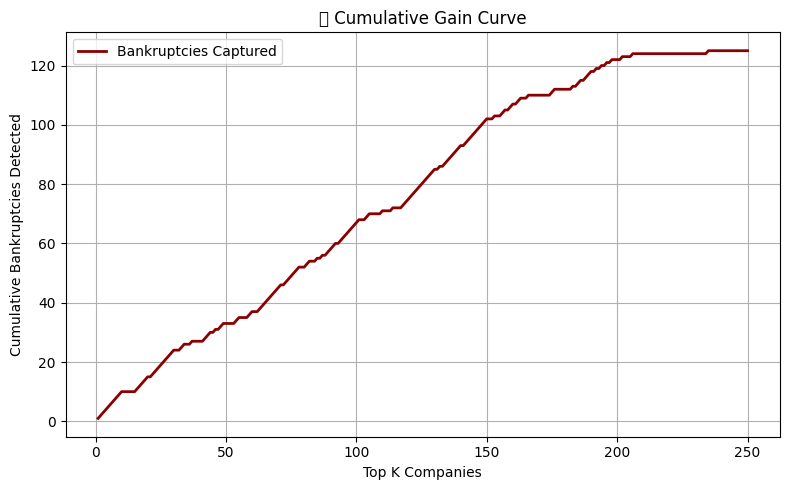

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRanker
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, roc_auc_score
from itertools import product

# ✅ Assume your data is prepared
# X_resampled, y_resampled = SMOTE output
# X_test, y_test = from train_test_split()

# 🚀 Step 1: Final train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

group_train = [X_train.shape[0]]  # One group
group_test = [X_test.shape[0]]    # One group

# 🧪 Step 2: Hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'n_estimators': [100, 200],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# 📊 Step 3: Manual Grid Search
best_score = -np.inf
best_model = None
best_params = {}

for lr, md, ne, ss, cs in product(
        param_grid['learning_rate'],
        param_grid['max_depth'],
        param_grid['n_estimators'],
        param_grid['subsample'],
        param_grid['colsample_bytree']):

    model = XGBRanker(
        objective='rank:pairwise',
        learning_rate=lr,
        max_depth=md,
        n_estimators=ne,
        subsample=ss,
        colsample_bytree=cs,
        random_state=42,
        eval_metric='ndcg'
    )

    model.fit(
        X_train, y_train,
        group=group_train,
        eval_set=[(X_test, y_test)],
        eval_group=[group_test],
        verbose=False
    )

    y_pred = model.predict(X_test)
    score = average_precision_score(y_test, y_pred)

    if score > best_score:
        best_score = score
        best_model = model
        best_params = {
            'learning_rate': lr,
            'max_depth': md,
            'n_estimators': ne,
            'subsample': ss,
            'colsample_bytree': cs
        }
        print(f"✅ New best AP: {score:.4f} with {best_params}")

# ✅ Step 4: Final evaluation with best model
y_scores = best_model.predict(X_test)

print(f"\n📈 Final ROC-AUC Score: {roc_auc_score(y_test, y_scores):.4f}")
print(f"📊 Final Average Precision Score: {average_precision_score(y_test, y_scores):.4f}")

def precision_at_k(y_true, y_scores, k):
    top_k_idx = np.argsort(y_scores)[::-1][:k]
    return np.sum(y_true[top_k_idx]) / k

for k in [5, 10, 20]:
    print(f"🎯 Precision@{k}: {precision_at_k(y_test, y_scores, k):.4f}")

# 📈 Step 5: Cumulative Gain Curve
def cumulative_gain(y_true, y_scores):
    sorted_idx = np.argsort(y_scores)[::-1]
    y_sorted = y_true[sorted_idx]
    gains = np.cumsum(y_sorted)
    x = np.arange(1, len(gains) + 1)

    plt.figure(figsize=(8, 5))
    plt.plot(x, gains, label='Bankruptcies Captured', color='darkred', linewidth=2)
    plt.xlabel('Top K Companies')
    plt.ylabel('Cumulative Bankruptcies Detected')
    plt.title('📈 Cumulative Gain Curve')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

cumulative_gain(y_test, y_scores)
